# Final Project Submission


* Student name: Chris Lewis
* Student pace: part time - online
* Scheduled project review date/time: 6/9/2020
* Instructor name: James Irving
* Blog post URL: http://lewis34cs.github.io/the_mysteries_of_the_fabled_violin_plot


# Generic Question for Project

## What type of films are currently doing the best at the box office?
## You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

# Import


#### Importing libraries:

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from pandasql import sqldf
from scipy.stats import sem

# Reading files and placing them into separate dataframes

## Using pandas read_csv() function to put each file from the zipped folder into a Dataframe.

#### We are taking the first file (bom.movie_gross.csv.gz) and putting it  into the variable 'movie_gross_df' as a dataframe object.

In [2]:
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross_df.head(3)

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010

In [3]:
movie_gross_df = movie_gross_df.rename(columns={'title':'primary_title'})

In [4]:
movie_gross_df.dtypes

primary_title      object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [5]:
len(movie_gross_df)

3387

#### Within the dtypes of the movie_gross_df, we notice that the foreign_gross column contains object values - most likely string values. So let's change those to floats. There are also commas within the values, so we will need to remove those with the .replace() method.

In [6]:
type(movie_gross_df['foreign_gross'][0])

str

In [7]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].str.replace(',', '')
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype(float)
movie_gross_df.dtypes

primary_title      object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

#### Our next file (imdb.name.basics.csv.gz) is placed into the 'imdb_name_df' variable. This dataframe doesn't seem like it will be very useful to begin with, so let's save cleaning it for later if we need to come back to it.

In [8]:
imdb_name_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_name_df.head(3)

nconst       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   

                           primary_profession  \
0   miscellaneous,production_manager,producer   
1  composer,music_department,sound_department   
2                  miscellaneous,actor,writer   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553  
1  tt0896534,tt6791238,tt0287072,tt1682940  
2  tt1470654,tt0363631,tt0104030,tt0102898

In [9]:
imdb_name_df.dtypes

nconst                 object
primary_name           object
birth_year            float64
death_year            float64
primary_profession     object
known_for_titles       object
dtype: object

#### Our next file (imdb.title.akas.csv.gz) is put into the 'imdb_title_df' variable. Let's inspect the contents.

In [10]:
imdb_title_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_title_df.head(3)

title_id  ordering                                    title region  \
0  tt0369610        10                            Джурасик свят     BG   
1  tt0369610        11                        Jurashikku warudo     JP   
2  tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   

  language        types attributes  is_original_title  
0       bg          NaN        NaN                0.0  
1      NaN  imdbDisplay        NaN                0.0  
2      NaN  imdbDisplay        NaN                0.0

In [11]:
imdb_title_df.dtypes

title_id              object
ordering               int64
title                 object
region                object
language              object
types                 object
attributes            object
is_original_title    float64
dtype: object

#### Setting the column 'title_id' to 'tconst' to match some of the other dataframes similar columns to make it easier to join later on.

In [12]:
imdb_title_df = imdb_title_df.rename(columns={'title_id': 'tconst'})
imdb_title_df.head(1)

tconst  ordering          title region language types attributes  \
0  tt0369610        10  Джурасик свят     BG       bg   NaN        NaN   

   is_original_title  
0                0.0

In [13]:
len(imdb_title_df)

331703

In [14]:
imdb_title_df['region'].value_counts()

US     51490
XWW    18467
RU     13817
DE     11634
FR     10990
       ...  
NC         1
AI         1
LS         1
XNA        1
TO         1
Name: region, Length: 213, dtype: int64

#### Our next file (imdb.title.basics.csv.gz) is put into the 'imdb_title_basics' variable. Let's inspect the contents.

In [15]:
imdb_title_basics = pd.read_csv('zippeddata/imdb.title.basics.csv.gz')
imdb_title_basics.head(3)

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   

   start_year  runtime_minutes              genres  
0        2013            175.0  Action,Crime,Drama  
1        2019            114.0     Biography,Drama  
2        2018            122.0               Drama

In [16]:
imdb_title_basics.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [17]:
len(imdb_title_basics)

146144

#### Our next file (imdb.title.crew.csv.gz) is put into the 'imdb_crew_df' variable. Let's inspect the contents.

In [18]:
imdb_title_crew_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_title_crew_df.head(3)

tconst  directors              writers
0  tt0285252  nm0899854            nm0899854
1  tt0438973        NaN  nm0175726,nm1802864
2  tt0462036  nm1940585            nm1940585

In [19]:
imdb_title_crew_df.dtypes

tconst       object
directors    object
writers      object
dtype: object

In [20]:
len(imdb_title_crew_df)

146144

#### Our next file (imdb.title.principals.csv.gz) is put into the 'imdb_title_princ_df' variable. Let's inspect the contents.

In [21]:
imdb_title_princ_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_title_princ_df.head(3)

tconst  ordering     nconst  category       job   characters
0  tt0111414         1  nm0246005     actor       NaN  ["The Man"]
1  tt0111414         2  nm0398271  director       NaN          NaN
2  tt0111414         3  nm3739909  producer  producer          NaN

In [22]:
imdb_title_princ_df.dtypes

tconst        object
ordering       int64
nconst        object
category      object
job           object
characters    object
dtype: object

In [23]:
len(imdb_title_princ_df)

1028186

#### Our next file (imdb.title.ratings.csv.gz) is put into the 'imdb_title_rating_df' variable. Let's inspect the contents.

In [24]:
imdb_title_rating_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_title_rating_df.head(3)

tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20

In [25]:
imdb_title_rating_df.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

In [26]:
len(imdb_title_rating_df)

73856

#### Our next file (rt.movie_info.tsv.gz) will be put into the 'rt_movie_info_df' variable. However, the data within this file are separated by tabs rather than commas, so we will make sure to set the delimiter equal to '\t' within the read_csv method.

In [27]:
rt_movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', '\t')
rt_movie_info_df.head(3)

id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   

                         writer  theater_date      dvd_date currency  \
0                Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1  David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2                Allison Anders  Sep 13, 1996  Apr 18, 2000      NaN   

  box_office      runtime             studio  
0        NaN  104 minutes                NaN  
1    600,000  108 minutes  Entertainment One  
2        NaN  116 minutes                NaN

In [28]:
rt_movie_info_df.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

In [29]:
len(rt_movie_info_df)

1560

#### Our next file (rt.reviews.tsv.gz) is placed into the 'rt_reviews_df' variable. This file also a tsv file, however we will need to also set it's encoding to 'latin1' since it is not utf-8.

In [30]:
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', '\t', encoding='latin1')
rt_reviews_df.head(3)

id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018

In [31]:
rt_reviews_df.dtypes

id             int64
review        object
rating        object
fresh         object
critic        object
top_critic     int64
publisher     object
date          object
dtype: object

In [32]:
len(rt_reviews_df)

54432

#### Our next file (tmbd.movies.csv.gz) is placed into the 'tmbd_movies_df' variable. It has an extra column we don't need, so we are going to drop 'Unnamed: 0'.

In [33]:
tmbd_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tmbd_movies_df = tmbd_movies_df.drop(columns='Unnamed: 0', axis=1)
tmbd_movies_df.head(3)

genre_ids     id original_language  \
0      [12, 14, 10751]  12444                en   
1  [14, 12, 16, 10751]  10191                en   
2        [12, 28, 878]  10138                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368

In [34]:
tmbd_movies_df.dtypes

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [35]:
len(tmbd_movies_df)

26517

#### Our final file (tn.movie_budgets.csv.gz) will be placed in the 'tn_movie_budget_df' variable.

In [36]:
tn_movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie_budget.head(3)

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350

In [37]:
tn_movie_budget.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

#### Here we see within the tn_movie_budget_df, production_budget, domestic_gross, and worldwide_gross all contain string values that have dollar signs and commas within them. We are going to replace the dollar signs and commas and turn these string values into float types.

In [38]:
tn_movie_budget['production_budget'] = tn_movie_budget['production_budget'].str.replace('$', '')
tn_movie_budget['production_budget'] = tn_movie_budget['production_budget'].str.replace(',', '')
tn_movie_budget['domestic_gross'] = tn_movie_budget['domestic_gross'].str.replace('$', '')
tn_movie_budget['domestic_gross'] = tn_movie_budget['domestic_gross'].str.replace(',', '')
tn_movie_budget['worldwide_gross'] = tn_movie_budget['worldwide_gross'].str.replace('$', '')
tn_movie_budget['worldwide_gross'] = tn_movie_budget['worldwide_gross'].str.replace(',', '')

In [39]:
tn_movie_budget['production_budget'] = tn_movie_budget['production_budget'].astype(float)
tn_movie_budget['domestic_gross'] = tn_movie_budget['domestic_gross'].astype(float)
tn_movie_budget['worldwide_gross'] = tn_movie_budget['worldwide_gross'].astype(float)

In [40]:
tn_movie_budget.head(3)

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   

   production_budget  domestic_gross  worldwide_gross  
0        425000000.0     760507625.0     2.776345e+09  
1        410600000.0     241063875.0     1.045664e+09  
2        350000000.0      42762350.0     1.497624e+08

In [41]:
len(tn_movie_budget)

5782

#### We are going to rename the column 'movie' to 'primary_title', so we can use that column to more easily join to other dataframes.

In [42]:
tn_movie_budget = tn_movie_budget.rename(columns={'movie': 'primary_title'})

In [43]:
tn_movie_budget.head(3)

id  release_date                                primary_title  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   

   production_budget  domestic_gross  worldwide_gross  
0        425000000.0     760507625.0     2.776345e+09  
1        410600000.0     241063875.0     1.045664e+09  
2        350000000.0      42762350.0     1.497624e+08

## Putting Dataframe names into a list:

#### We make a list so we can go through each of the dataframes by using the functions we made below to see the info more clearly.

In [44]:
df_list = [movie_gross_df, imdb_name_df, imdb_title_df, imdb_title_basics, imdb_title_crew_df, imdb_title_princ_df,
           imdb_title_rating_df, rt_movie_info_df, rt_reviews_df, tmbd_movies_df, tn_movie_budget]
len(df_list)

11

# Defining functions: 
#### get_df_name() will return only the DataFrame's variable name

In [45]:
def get_df_name(df):
    # Retrieved from: https://stackoverflow.com/questions/31727333/get-the-name-of-a-pandas-dataframe
    name =[x for x in globals() if globals()[x] is df][0]
    return name

#### get_df_col() will return a list containing the names of each column within that DataFrame.

In [46]:
def get_df_col(df):
    col_list = []
    for col in df.columns:
        col_list.append(col)
    return col_list

#### perc_null() will return the percent of null values present in each column of each DataFrame.

In [47]:
def perc_null(df):
    return df.isna().sum().divide(len(df))*100

#### pysqldf() function will return a dataframe with certain columns (dictated by what we SELECT) 

In [48]:
def pysqldf(q):
    return sqldf(q, globals())

## Using a for loop to see info on all dataframes

### We'll run each dataframe contained within the df_list variable and use the above functions to return each of the DataFrames' name along with their column names, as well as the percent of null values within each column in a nice order so we can view and compare their columns more easily.

In [49]:
for df in df_list:
    print(f"Name: {get_df_name(df)}\ncolumns: {get_df_col(df)}\ndf length:{len(df)}\nPercent Null:\n{perc_null(df)}\n\n")

Name: movie_gross_df
columns: ['primary_title', 'studio', 'domestic_gross', 'foreign_gross', 'year']
df length:3387
Percent Null:
primary_title      0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64


Name: imdb_name_df
columns: ['nconst', 'primary_name', 'birth_year', 'death_year', 'primary_profession', 'known_for_titles']
df length:606648
Percent Null:
nconst                 0.000000
primary_name           0.000000
birth_year            86.361778
death_year            98.881889
primary_profession     8.462898
known_for_titles       4.978835
dtype: float64


Name: imdb_title_df
columns: ['tconst', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'is_original_title']
df length:331703
Percent Null:
tconst                0.000000
ordering              0.000000
title                 0.000000
region               16.066481
language             87.423991
types                49.217523
attr

# Cleaning Data

### Right now, our target dataframes of interest are: imdb_title_basics and tn_movie_budget. Let's start by cleaning these dataframes. Above, we can view the percent of null values within each dataframe. tn_movie_budget seems to have no null values, and imdb_title_basics has very few. So let's start with imdb_title_basics. 

#### We really only care about the primary_title and genres columns within this dataframe, so let's go ahead and clean those up.

In [50]:
imdb_title_basics_clean = imdb_title_basics.copy()

In [51]:
imdb_title_basics_clean.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [52]:
perc_null(imdb_title_basics_clean)

tconst              0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

#### The column with the largest  null value is runtime_minutes with 21.7% null values. We don't really need this column for the first question, but we can at least replace the NaN values with 0 for the time being.

In [53]:
imdb_title_basics_clean['runtime_minutes'] = imdb_title_basics_clean['runtime_minutes'].fillna(0)

In [54]:
perc_null(imdb_title_basics_clean)

tconst             0.000000
primary_title      0.000000
original_title     0.014369
start_year         0.000000
runtime_minutes    0.000000
genres             3.700460
dtype: float64

#### For the genres column, we can just replace the null values with 'N/A'

In [55]:
imdb_title_basics_clean['genres'] = imdb_title_basics_clean['genres'].fillna('N/A')

In [56]:
perc_null(imdb_title_basics_clean)

tconst             0.000000
primary_title      0.000000
original_title     0.014369
start_year         0.000000
runtime_minutes    0.000000
genres             0.000000
dtype: float64

#### Even though we aren't going to be using original_title for anything, we can still replace the null values with "unknown".

In [57]:
imdb_title_basics_clean['original_title'] = imdb_title_basics_clean['original_title'].fillna('Unknown')

#### Now let's overwrite the existing dataframe by targeting the 'primary_title' column and selecting all rows that do NOT contain null values in this column

In [58]:
len(imdb_title_basics_clean['primary_title'])

146144

In [59]:
imdb_title_basics_clean = imdb_title_basics_clean[imdb_title_basics_clean['primary_title'].notna()]

In [60]:
len(imdb_title_basics_clean['primary_title'])

146144

In [61]:
perc_null(imdb_title_basics_clean)

tconst             0.0
primary_title      0.0
original_title     0.0
start_year         0.0
runtime_minutes    0.0
genres             0.0
dtype: float64

#### Since we are going to use the column 'primary_title' as a  way to join dataframes for this question, let's find remove any duplicate values contained within the column. Since some movies may have the same title name, let's make sure to also use 'start_year' as an identifier for any true duplicate rows.

In [62]:
imdb_title_basics_clean.duplicated(['primary_title', 'start_year']).value_counts()

False    144072
True       2072
dtype: int64

In [63]:
imdb_title_basics_clean = imdb_title_basics_clean.drop_duplicates(subset=['primary_title', 'start_year'])

In [64]:
imdb_title_basics_clean.duplicated(['primary_title', 'start_year']).value_counts()

False    144072
dtype: int64

### Cleaning tn_movie_budget_df

#### The columns we care about in this dataframe are: primary_title, production_budget, release_date and worldwide_gross.

In [65]:
tn_movie_budget_df = tn_movie_budget.copy()

In [66]:
tn_movie_budget_df.head(3)

id  release_date                                primary_title  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   

   production_budget  domestic_gross  worldwide_gross  
0        425000000.0     760507625.0     2.776345e+09  
1        410600000.0     241063875.0     1.045664e+09  
2        350000000.0      42762350.0     1.497624e+08

In [67]:
perc_null(tn_movie_budget_df)

id                   0.0
release_date         0.0
primary_title        0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

In [68]:
tn_movie_budget_df.dtypes

id                     int64
release_date          object
primary_title         object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

## Test Area

In [69]:
practice = tn_movie_budget.copy().reset_index(drop=True)

In [70]:
practice.head()

id  release_date                                primary_title  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0        425000000.0     760507625.0     2.776345e+09  
1        410600000.0     241063875.0     1.045664e+09  
2        350000000.0      42762350.0     1.497624e+08  
3        330600000.0     459005868.0     1.403014e+09  
4        317000000.0     620181382.0     1.316722e+09

In [71]:
practice['release_date'] = pd.to_datetime(practice['release_date'])

In [72]:
practice.sort_values('release_date', ascending=False)

id release_date                   primary_title  production_budget  \
194   95   2020-12-31                        Moonfall        150000000.0   
1205   6   2020-12-31          Hannibal the Conqueror         50000000.0   
535   36   2020-02-21                Call of the Wild         82000000.0   
480   81   2019-12-31                Army of the Dead         90000000.0   
3515  16   2019-12-31                             Eli         11000000.0   
...   ..          ...                             ...                ...   
5606   7   1925-11-19                  The Big Parade           245000.0   
5683  84   1920-09-17  Over the Hill to the Poorhouse           100000.0   
5614  15   1916-12-24    20,000 Leagues Under the Sea           200000.0   
5523  24   1916-09-05                     Intolerance           385907.0   
5677  78   1915-02-08           The Birth of a Nation           110000.0   

      domestic_gross  worldwide_gross  
194              0.0              0.0  
1205             0.0              0.0  
535              0.0              0.0  
480              0.0              0.0  
3515             0.0              0.0  
...              ...              ...  
5606      11000000.0       22000000.0  
5683       3000000.0        3000000.0  
5614       8000000.0        8000000.0  
5523             0.0              0.0  
5677      10000000.0       11000000.0  

[5782 rows x 6 columns]

## End Test Area

#### While we could change release_date into a pd.datetime object, however we are just going to change it into a numpy.int64 instead.

In [73]:
type(tn_movie_budget_df['release_date'][0])

str

In [74]:
len(tn_movie_budget_df['release_date'][0])

12

In [75]:
tn_movie_budget_df['release_date'][0][-4:]

'2009'

In [76]:
tn_movie_budget_df['release_date'] = tn_movie_budget_df['release_date'].map(lambda x:f'{x[-4:]}')

In [77]:
tn_movie_budget_df['release_date'][0]

'2009'

In [78]:
tn_movie_budget_df['release_date'] = tn_movie_budget_df['release_date'].astype('int64')

In [79]:
type(tn_movie_budget_df['release_date'][0])

numpy.int64

In [80]:
tn_movie_budget_df.sort_values('release_date', ascending=False)

id  release_date                   primary_title  production_budget  \
194   95          2020                        Moonfall        150000000.0   
535   36          2020                Call of the Wild         82000000.0   
1205   6          2020          Hannibal the Conqueror         50000000.0   
2029  30          2019                        Unhinged         29000000.0   
670   71          2019                       PLAYMOBIL         75000000.0   
...   ..           ...                             ...                ...   
5606   7          1925                  The Big Parade           245000.0   
5683  84          1920  Over the Hill to the Poorhouse           100000.0   
5614  15          1916    20,000 Leagues Under the Sea           200000.0   
5523  24          1916                     Intolerance           385907.0   
5677  78          1915           The Birth of a Nation           110000.0   

      domestic_gross  worldwide_gross  
194              0.0              0.0  
535              0.0              0.0  
1205             0.0              0.0  
2029             0.0              0.0  
670              0.0              0.0  
...              ...              ...  
5606      11000000.0       22000000.0  
5683       3000000.0        3000000.0  
5614       8000000.0        8000000.0  
5523             0.0              0.0  
5677      10000000.0       11000000.0  

[5782 rows x 6 columns]

In [81]:
tn_movie_budget_df.duplicated(['primary_title', 'release_date']).value_counts()

False    5781
True        1
dtype: int64

In [82]:
tn_movie_budget_df = tn_movie_budget_df.drop_duplicates(['primary_title', 'release_date'])

In [83]:
tn_movie_budget_df.head()

id  release_date                                primary_title  \
0   1          2009                                       Avatar   
1   2          2011  Pirates of the Caribbean: On Stranger Tides   
2   3          2019                                 Dark Phoenix   
3   4          2015                      Avengers: Age of Ultron   
4   5          2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0        425000000.0     760507625.0     2.776345e+09  
1        410600000.0     241063875.0     1.045664e+09  
2        350000000.0      42762350.0     1.497624e+08  
3        330600000.0     459005868.0     1.403014e+09  
4        317000000.0     620181382.0     1.316722e+09

# Question 1: Is there an association between production budget and Worldwide Gross for Movies in the Past Ten Years?

### make a dataframe containing ALL movies from 2010-2020 where worldwide gross is not 0.

In [84]:
bud_v_net = pysqldf("""SELECT i.tconst, i.genres, i.runtime_minutes, t.*
                    FROM tn_movie_budget_df t
                    JOIN imdb_title_basics_clean i
                    USING(primary_title)
                    WHERE (release_date > 2009 AND release_date <= 2020)
                           AND (worldwide_gross != 0);""")

In [85]:
 bud_v_net['tot_profit'] = bud_v_net['worldwide_gross'] - bud_v_net['production_budget']

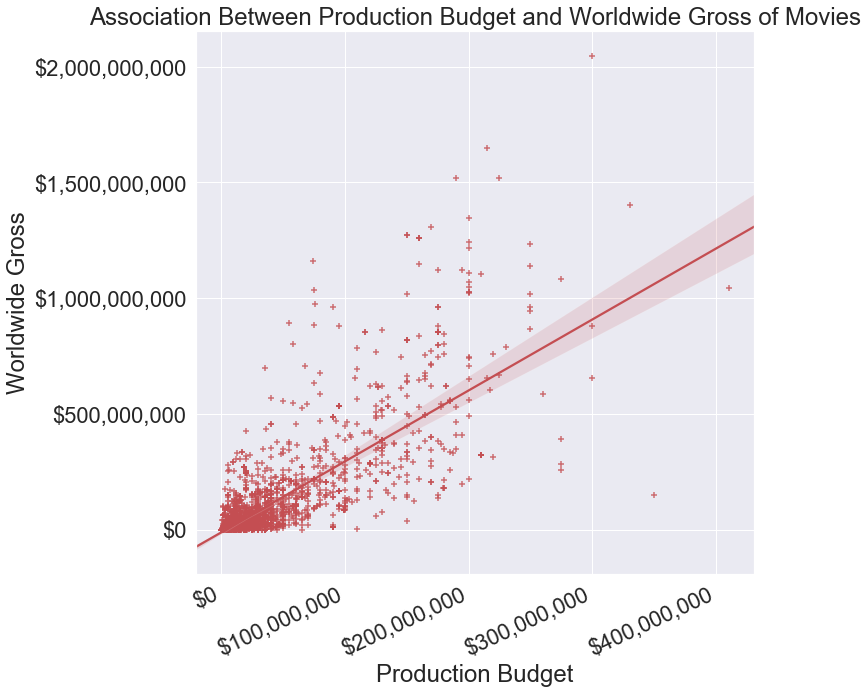

In [86]:
plt.figure(figsize=(10,10))
sns.set(style='darkgrid', font_scale=2)
s = sns.regplot('production_budget', 'worldwide_gross', data=bud_v_net, 
                ci=99, robust=True, color='r', marker='+')
s.set_xlabel('Production Budget')
s.set_ylabel('Worldwide Gross')
s.set_title('Association Between Production Budget and Worldwide Gross of Movies')
s.set_xticklabels(s.get_xticklabels(), rotation=25, ha='right')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
s.yaxis.set_major_formatter(tick)
s.xaxis.set_major_formatter(tick);

In [87]:
bud_v_net.corr()

runtime_minutes        id  release_date  production_budget  \
runtime_minutes           1.000000 -0.046317      0.039317           0.185647   
id                       -0.046317  1.000000      0.045306          -0.038818   
release_date              0.039317  0.045306      1.000000           0.049710   
production_budget         0.185647 -0.038818      0.049710           1.000000   
domestic_gross            0.154092  0.011343      0.085121           0.715502   
worldwide_gross           0.172186 -0.011350      0.084282           0.784757   
tot_profit                0.154772 -0.002510      0.087671           0.660855   

                   domestic_gross  worldwide_gross  tot_profit  
runtime_minutes          0.154092         0.172186    0.154772  
id                       0.011343        -0.011350   -0.002510  
release_date             0.085121         0.084282    0.087671  
production_budget        0.715502         0.784757    0.660855  
domestic_gross           1.000000         0.946856    0.939473  
worldwide_gross          0.946856         1.000000    0.983782  
tot_profit               0.939473         0.983782    1.000000

## Answer:

#### Since the correlation between production_budget and worldwide_gross is greater than 0.7 (it is 0.78), we can conclude that there is a strong, positive correlation between production_budget and worldwide_gross.

## Test Area


In [277]:
rate_v_roi = pysqldf("""SELECT c.primary_title, r.averagerating, b.production_budget,
                        b.worldwide_gross, b.release_date
                        FROM imdb_title_basics_clean c
                        JOIN imdb_title_rating_df r
                        USING(tconst)
                        JOIN tn_movie_budget_df b
                        USING(primary_title)
                        WHERE (worldwide_gross != 0);""")

In [278]:
len(rate_v_roi)

2459

In [279]:
rate_v_roi['tot_profit'] = rate_v_roi['worldwide_gross'] - rate_v_roi['production_budget']

In [280]:
rate_v_roi['ROI'] = (rate_v_roi['tot_profit']/rate_v_roi['production_budget']) * 100

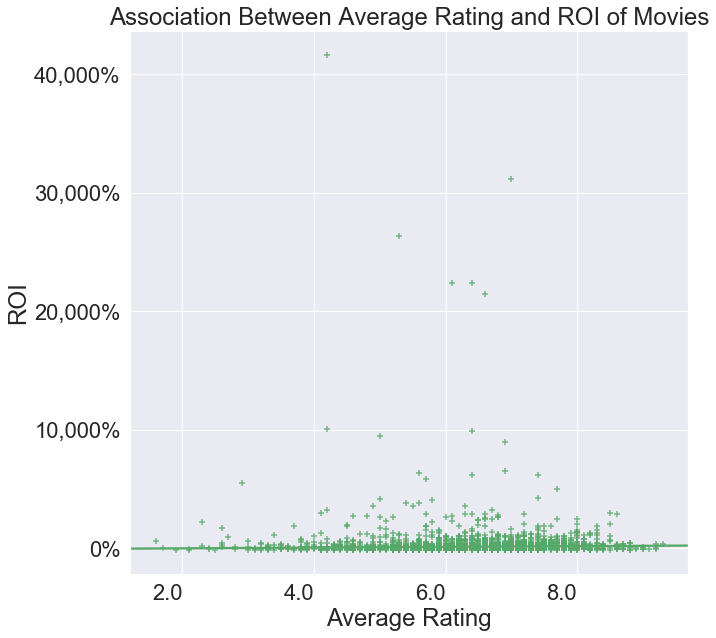

In [281]:
plt.figure(figsize=(10,10))
sns.set(style='darkgrid', font_scale=2)
s = sns.regplot('averagerating', 'ROI', data=rate_v_roi, robust=True,
                ci=68, color='g', marker='+')
s.set_xlabel('Average Rating')
s.set_ylabel('ROI')
s.set_title('Association Between Average Rating and ROI of Movies')
s.set_xticklabels(s.get_xticklabels(), ha='right')
fmt1 = '{x:,.0f}%'
tick1 = mtick.StrMethodFormatter(fmt1)
fmt2 = '{x:,.0f}.0'
tick2 = mtick.StrMethodFormatter(fmt2)
s.yaxis.set_major_formatter(tick1)
s.xaxis.set_major_formatter(tick2);

In [282]:
rate_v_roi.corr()

averagerating  production_budget  worldwide_gross  \
averagerating           1.000000           0.105962         0.159240   
production_budget       0.105962           1.000000         0.774251   
worldwide_gross         0.159240           0.774251         1.000000   
release_date            0.045477           0.136020         0.107443   
tot_profit              0.161573           0.650410         0.984305   
ROI                    -0.009020          -0.060316         0.081843   

                   release_date  tot_profit       ROI  
averagerating          0.045477    0.161573 -0.009020  
production_budget      0.136020    0.650410 -0.060316  
worldwide_gross        0.107443    0.984305  0.081843  
release_date           1.000000    0.091025 -0.233376  
tot_profit             0.091025    1.000000  0.115048  
ROI                   -0.233376    0.115048  1.000000

#### According to the graph above, there is no correlation (-0.009) between the average rating of voters and the Return On Investment of movies.

In [283]:
rate_v_bud = pysqldf("""SELECT *
                        FROM rate_v_roi
                        WHERE (release_date > 2009 AND release_date <= 2020);""")

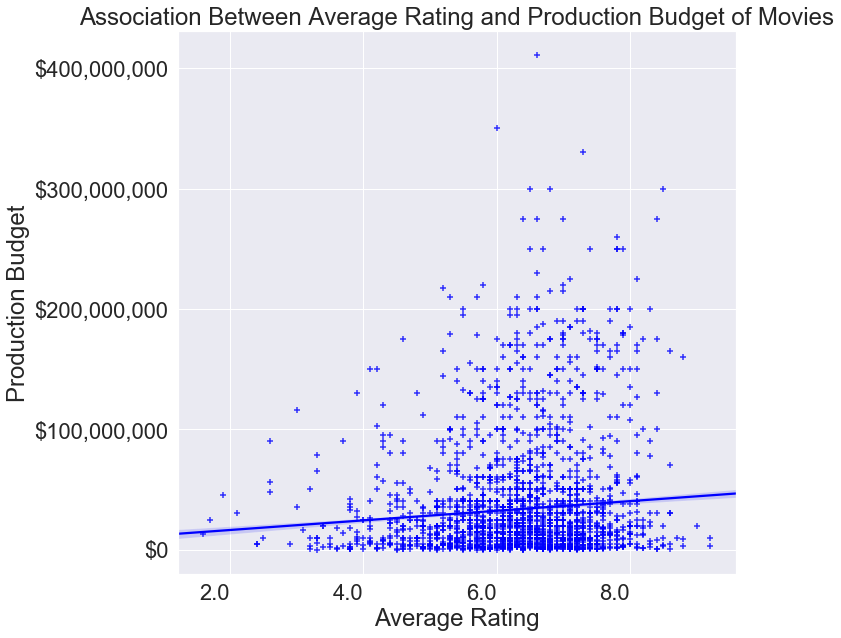

In [288]:
plt.figure(figsize=(10,10))
sns.set(style='darkgrid', font_scale=2)
s = sns.regplot('averagerating', 'production_budget', data=rate_v_bud, robust=True,
                ci=68, color='blue', marker='+')
s.set_xlabel('Average Rating')
s.set_ylabel('Production Budget')
s.set_title('Association Between Average Rating and Production Budget of Movies')
s.set_xticklabels(s.get_xticklabels(), ha='right')
fmt1 = '${x:,.0f}'
tick1 = mtick.StrMethodFormatter(fmt1)
fmt2 = '{x:,.0f}.0'
tick2 = mtick.StrMethodFormatter(fmt2)
s.yaxis.set_major_formatter(tick1)
s.xaxis.set_major_formatter(tick2);

In [289]:
rate_v_bud.corr()

averagerating  production_budget  worldwide_gross  \
averagerating           1.000000           0.140121         0.211653   
production_budget       0.140121           1.000000         0.785277   
worldwide_gross         0.211653           0.785277         1.000000   
release_date            0.014295           0.042997         0.083660   
tot_profit              0.215779           0.661278         0.983732   
ROI                    -0.004713          -0.043076         0.097787   

                   release_date  tot_profit       ROI  
averagerating          0.014295    0.215779 -0.004713  
production_budget      0.042997    0.661278 -0.043076  
worldwide_gross        0.083660    0.983732  0.097787  
release_date           1.000000    0.088886  0.039526  
tot_profit             0.088886    1.000000  0.130974  
ROI                    0.039526    0.130974  1.000000

#### According to the graph, there is little to no correlation (0.12) between Production Budget and Average Rating

In [290]:
rate_v_tot = rate_v_bud.copy()

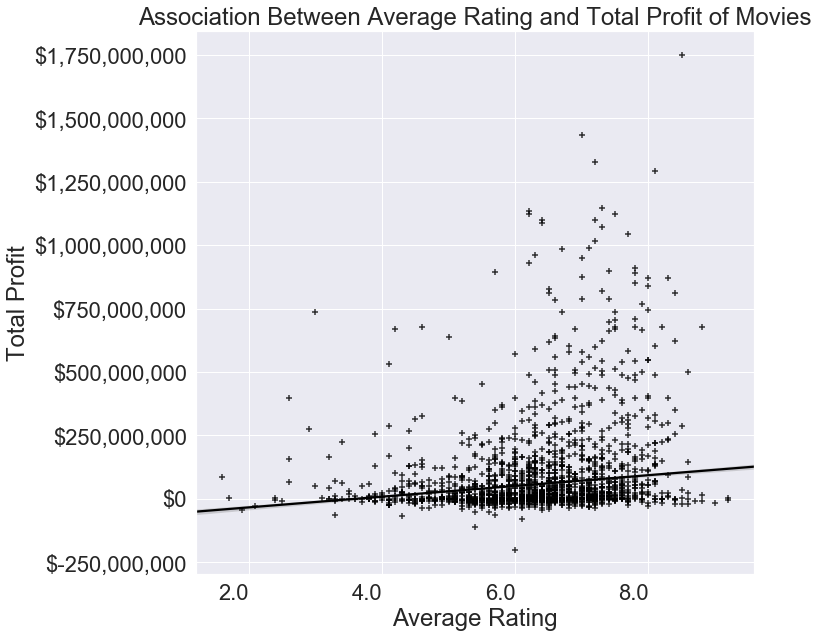

In [291]:
plt.figure(figsize=(10,10))
sns.set(style='darkgrid', font_scale=2)
s = sns.regplot('averagerating', 'tot_profit', data=rate_v_bud, robust=True,
                ci=68, color='black', marker='+')
s.set_xlabel('Average Rating')
s.set_ylabel('Total Profit')
s.set_title('Association Between Average Rating and Total Profit of Movies')
s.set_xticklabels(s.get_xticklabels(), ha='right')
fmt1 = '${x:,.0f}'
tick1 = mtick.StrMethodFormatter(fmt1)
fmt2 = '{x:,.0f}.0'
tick2 = mtick.StrMethodFormatter(fmt2)
s.yaxis.set_major_formatter(tick1)
s.xaxis.set_major_formatter(tick2);

In [292]:
rate_v_tot.corr()

averagerating  production_budget  worldwide_gross  \
averagerating           1.000000           0.140121         0.211653   
production_budget       0.140121           1.000000         0.785277   
worldwide_gross         0.211653           0.785277         1.000000   
release_date            0.014295           0.042997         0.083660   
tot_profit              0.215779           0.661278         0.983732   
ROI                    -0.004713          -0.043076         0.097787   

                   release_date  tot_profit       ROI  
averagerating          0.014295    0.215779 -0.004713  
production_budget      0.042997    0.661278 -0.043076  
worldwide_gross        0.083660    0.983732  0.097787  
release_date           1.000000    0.088886  0.039526  
tot_profit             0.088886    1.000000  0.130974  
ROI                    0.039526    0.130974  1.000000

#### according to the graph, there is little to no correlation (0.216) between average ratings and total profit.

In [94]:
rate_v_wwg = pysqldf("""SELECT c.primary_title, r.averagerating, b.production_budget,
                        b.worldwide_gross, b.release_date
                        FROM imdb_title_basics_clean c
                        JOIN imdb_title_rating_df r
                        USING(tconst)
                        JOIN tn_movie_budget_df b
                        USING(primary_title)
                        WHERE (worldwide_gross != 0)
                               AND (b.release_date > 2009 AND b.release_date <= 2020);""")

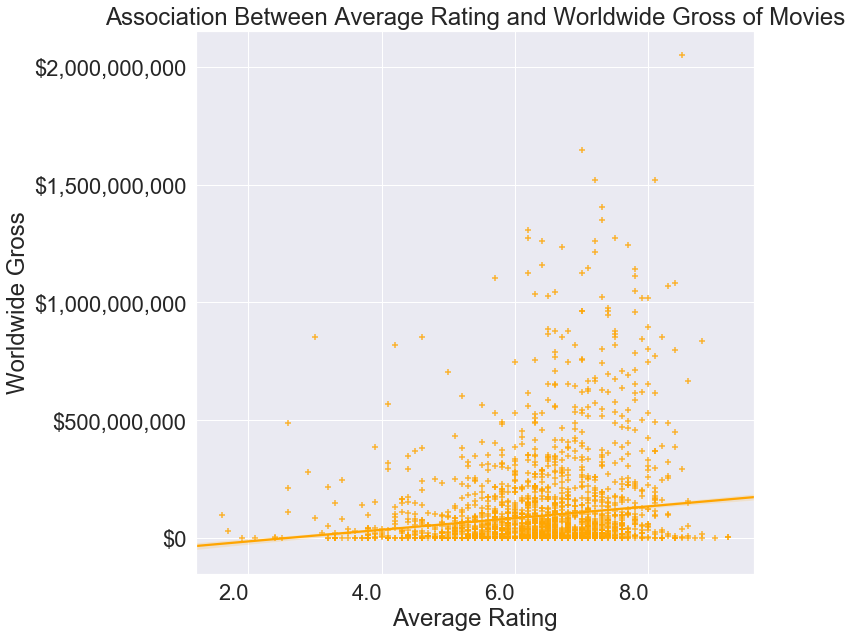

In [95]:
plt.figure(figsize=(10,10))
sns.set(style='darkgrid', font_scale=2)
s = sns.regplot('averagerating', 'worldwide_gross', data=rate_v_wwg, robust=True,
                ci=68, color='orange', marker='+')
s.set_xlabel('Average Rating')
s.set_ylabel('Worldwide Gross')
s.set_title('Association Between Average Rating and Worldwide Gross of Movies')
s.set_xticklabels(s.get_xticklabels(), ha='right')
fmt1 = '${x:,.0f}'
tick1 = mtick.StrMethodFormatter(fmt1)
fmt2 = '{x:,.0f}.0'
tick2 = mtick.StrMethodFormatter(fmt2)
s.yaxis.set_major_formatter(tick1)
s.xaxis.set_major_formatter(tick2);

In [96]:
rate_v_wwg.corr()

averagerating  production_budget  worldwide_gross  \
averagerating           1.000000           0.140121         0.211653   
production_budget       0.140121           1.000000         0.785277   
worldwide_gross         0.211653           0.785277         1.000000   
release_date            0.014295           0.042997         0.083660   

                   release_date  
averagerating          0.014295  
production_budget      0.042997  
worldwide_gross        0.083660  
release_date           1.000000

#### According to the graph above, there is little to no correlation (0.21) between Average Rating and Worldwide gross of movies.

In [97]:
min_v_bud = pysqldf("""SELECT b.*, c.runtime_minutes
                        FROM imdb_title_basics_clean c
                        JOIN imdb_title_rating_df r
                        USING(tconst)
                        JOIN tn_movie_budget_df b
                        USING(primary_title)
                        WHERE (runtime_minutes > 0)
                               AND (production_budget > 0);""")

In [98]:
min_v_bud.head()

id  release_date                    primary_title  production_budget  \
0  26          2012                       Foodfight!         45000000.0   
1  21          2015                    The Overnight           200000.0   
2  17          2013                      On the Road         25000000.0   
3  37          2013  The Secret Life of Walter Mitty         91000000.0   
4  67          2014      A Walk Among the Tombstones         28000000.0   

   domestic_gross  worldwide_gross  runtime_minutes  
0             0.0          73706.0             91.0  
1       1109808.0        1165996.0             88.0  
2        720828.0        9313302.0            124.0  
3      58236838.0      187861183.0            114.0  
4      26017685.0       62108587.0            114.0

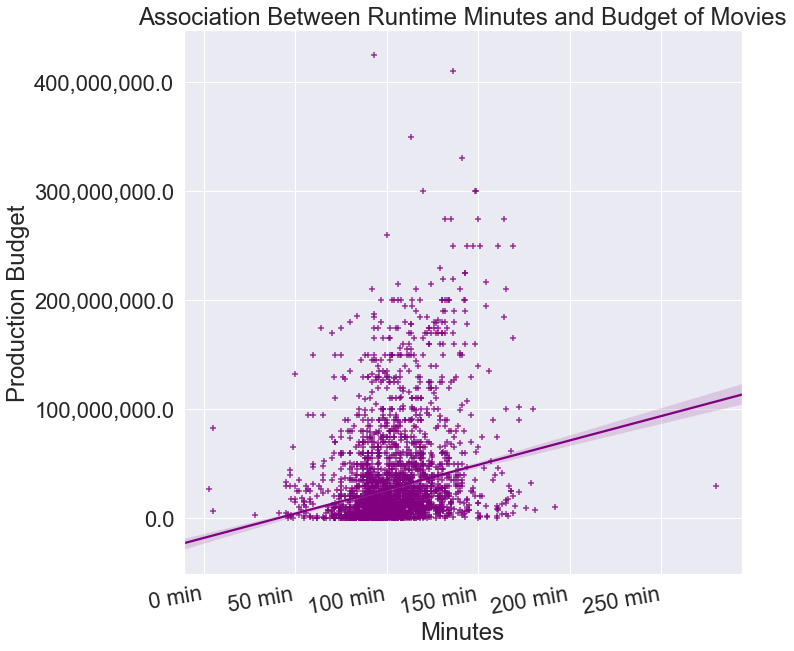

In [99]:
plt.figure(figsize=(10,10))
sns.set(style='darkgrid', font_scale=2)
s = sns.regplot('runtime_minutes', 'production_budget', data=min_v_bud, robust=True,
                ci=68, color='purple', marker='+')
s.set_xlabel('Minutes')
s.set_ylabel('Production Budget')
s.set_title('Association Between Runtime Minutes and Budget of Movies')
s.set_xticklabels(s.get_xticklabels(), ha='right', rotation=10)
fmt1 = '{x:,.0f} min'
tick1 = mtick.StrMethodFormatter(fmt1)
fmt2 = '{x:,.0f}.0'
tick2 = mtick.StrMethodFormatter(fmt2)
s.yaxis.set_major_formatter(tick2)
s.xaxis.set_major_formatter(tick1);

In [100]:
min_v_bud.corr()

id  release_date  production_budget  domestic_gross  \
id                 1.000000      0.003202          -0.045578       -0.005488   
release_date       0.003202      1.000000           0.114039        0.055354   
production_budget -0.045578      0.114039           1.000000        0.717247   
domestic_gross    -0.005488      0.055354           0.717247        1.000000   
worldwide_gross   -0.021132      0.095251           0.785041        0.945452   
runtime_minutes   -0.036211      0.098647           0.265457        0.215024   

                   worldwide_gross  runtime_minutes  
id                       -0.021132        -0.036211  
release_date              0.095251         0.098647  
production_budget         0.785041         0.265457  
domestic_gross            0.945452         0.215024  
worldwide_gross           1.000000         0.229400  
runtime_minutes           0.229400         1.000000

#### According to the graph above, there is little or no correlation (0.265) between runtime minutes of a movie and its production budget.

## End test Area

# Question 2: Which genres (from U.S. movies) have been performing the best in terms of average total net profit since 2010?

## Finding Unique Genres

#### First, let's grab only the movies that were created in the United States.

In [101]:
imdb_title_basics_df = pysqldf('''SELECT b.*
                                  FROM imdb_title_basics_clean b
                                  JOIN imdb_title_df t
                                  USING (tconst)
                                  WHERE (t.region = 'US')
                                  GROUP BY (primary_title);''')

#### We are going to use the imdb_title_basics_df['genres'] column to retrieve all unique genres within that column.

In [102]:
imdb_title_basics_df.head(3)

tconst          primary_title        original_title  start_year  \
0  tt1699720  !Women Art Revolution  Women Art Revolution        2010   
1  tt2346170       #1 Serial Killer      #1 Serial Killer        2013   
2  tt3120962                     #5                    #5        2013   

   runtime_minutes                    genres  
0             83.0               Documentary  
1             87.0                    Horror  
2             68.0  Biography,Comedy,Fantasy

In [103]:
# for i, row in imdb_title_basics_df.iterrows():
#     if row['primary_title'] == 'Avatar':
#         print(i, row['original_title'], row['genres'], row['tconst'], row['start_year'])

In [104]:
# imdb_title_basics_df.loc[17060, 'primary_title'] = 'Abatâ'

#### In order to get what we want, we are going to run a test on the first row of the genre column

In [105]:
genre_list = imdb_title_basics_df['genres']
test = imdb_title_basics_df['genres'].iloc[0]
test

'Documentary'

In [106]:
type(test)

str

#### Above we see that it is a string, so let's try to use the .str.contains() method to see what happens.

In [107]:
is_action = genre_list.str.contains('Documentary')
is_action[:5]

0     True
1    False
2    False
3    False
4     True
Name: genres, dtype: bool

#### It gave us a list of booleans based off of what we were searching for (in that example, 'Action'). Let's make a copy of the imdb_title_basics_df (only columns 'primary_title" and 'genres') so we don't accidentally overwrite that df and use the copy to experiment with.

In [108]:
df = imdb_title_basics_df[['primary_title','genres']].copy()
#df['is_action'] = df['genres'].str.contains('Action')

In [109]:
len(df)

45218

#### Let's split each string in each row of the column 'genres' in our new df and see what happens.

In [110]:
df['genres'].str.split(',')

0                       [Documentary]
1                            [Horror]
2        [Biography, Comedy, Fantasy]
3                            [Comedy]
4                       [Documentary]
                     ...             
45213                         [Drama]
45214                   [Documentary]
45215                         [Drama]
45216                         [Drama]
45217                   [Documentary]
Name: genres, Length: 45218, dtype: object

#### Now, let's make a  variable named 'genres' and use a comma as a separator and join all the data within the df['genres'] column into the 'genres' variable and drop any null values.

In [111]:
genres = ','.join(df['genres'].dropna())

In [112]:
len(genres)

668280

#### Let's make a new variable called 'unique_genres' and make a list of a set of the values within the variable 'genres' and have all values lowercased and split with ',' 

In [113]:
unique_genres = list(set(genres.lower().split(',')))
unique_genres

['adult',
 'biography',
 'adventure',
 'drama',
 'talk-show',
 'documentary',
 'mystery',
 'fantasy',
 'sci-fi',
 'reality-tv',
 'news',
 'romance',
 'game-show',
 'comedy',
 'music',
 'horror',
 'western',
 'crime',
 'animation',
 'action',
 'war',
 'history',
 'n/a',
 'musical',
 'family',
 'sport',
 'thriller',
 'short']

### Defining another Function

#### Let's make another function that will add a new column for each possible genre, where the value will be a boolean value for each movie within the dataframe.

In [114]:
def genre_cols(df, genres):
    for i in genres:
        if i == 'musical':
            df[f'is_music'] = df['genres'].str.contains(f'{i}'.title())
        else:
            df[f'is_{i}'] = df['genres'].str.contains(f'{i}'.title())
    return df
        

In [115]:
genre_df = genre_cols(df, unique_genres)
genre_df = genre_df.dropna()
genre_df = genre_df.drop(columns='genres')

In [116]:
genre_df.columns

Index(['primary_title', 'is_adult', 'is_biography', 'is_adventure', 'is_drama',
       'is_talk-show', 'is_documentary', 'is_mystery', 'is_fantasy',
       'is_sci-fi', 'is_reality-tv', 'is_news', 'is_romance', 'is_game-show',
       'is_comedy', 'is_music', 'is_horror', 'is_western', 'is_crime',
       'is_animation', 'is_action', 'is_war', 'is_history', 'is_n/a',
       'is_family', 'is_sport', 'is_thriller', 'is_short'],
      dtype='object')

In [117]:
genre_df.head(3)

primary_title  is_adult  is_biography  is_adventure  is_drama  \
0  !Women Art Revolution     False         False         False     False   
1       #1 Serial Killer     False         False         False     False   
2                     #5     False          True         False     False   

   is_talk-show  is_documentary  is_mystery  is_fantasy  is_sci-fi  ...  \
0         False            True       False       False      False  ...   
1         False           False       False       False      False  ...   
2         False           False       False        True      False  ...   

   is_crime  is_animation  is_action  is_war  is_history  is_n/a  is_family  \
0     False         False      False   False       False   False      False   
1     False         False      False   False       False   False      False   
2     False         False      False   False       False   False      False   

   is_sport  is_thriller  is_short  
0     False        False     False  
1     False        False     False  
2     False        False     False  

[3 rows x 28 columns]

## Separating grouped genres into individual genre columns with boolean values

#### We are going to join genre_df with imdb_title_basics_df using 'primary_title' as the column to join on and place that new dataframe in the variable indiv_genre.

In [118]:
imdb_title_basics_df.head(1)

tconst          primary_title        original_title  start_year  \
0  tt1699720  !Women Art Revolution  Women Art Revolution        2010   

   runtime_minutes       genres  
0             83.0  Documentary

In [119]:
indiv_genre = pysqldf("""Select g.*, i.tconst, i.original_title, i.genres
               FROM genre_df g
               JOIN imdb_title_basics_df i
               USING(primary_title)
               ;""")

In [120]:
len(imdb_title_basics_df)

45218

In [121]:
len(indiv_genre)

45218

In [122]:
indiv_genre.head(3)

primary_title  is_adult  is_biography  is_adventure  is_drama  \
0  !Women Art Revolution         0             0             0         0   
1       #1 Serial Killer         0             0             0         0   
2                     #5         0             1             0         0   

   is_talk-show  is_documentary  is_mystery  is_fantasy  is_sci-fi  ...  \
0             0               1           0           0          0  ...   
1             0               0           0           0          0  ...   
2             0               0           0           1          0  ...   

   is_war  is_history  is_n/a  is_family  is_sport  is_thriller  is_short  \
0       0           0       0          0         0            0         0   
1       0           0       0          0         0            0         0   
2       0           0       0          0         0            0         0   

      tconst        original_title                    genres  
0  tt1699720  Women Art Revolution               Documentary  
1  tt2346170      #1 Serial Killer                    Horror  
2  tt3120962                    #5  Biography,Comedy,Fantasy  

[3 rows x 31 columns]

#### Now let's join indiv_genre with tn_movie_budget_df using primary_title, where we filter out any movies that did not release between 2010 and 2020, and their worldwide gross is not equal to 0. We will place that joined dataframe in a variable called indiv_genre_df. 

In [123]:
indiv_genre_df = pysqldf("""SELECT i.*, t.production_budget, t.domestic_gross, t.worldwide_gross
                   FROM indiv_genre i
                   JOIN tn_movie_budget_df t
                   USING(primary_title)
                   WHERE (t.release_date > 2009 AND t.release_date <= 2020)
                         AND (t.worldwide_gross != 0);""")

In [124]:
indiv_genre_df.head(10)

primary_title  is_adult  is_biography  \
0  Pirates of the Caribbean: On Stranger Tides         0             0   
1                                 Dark Phoenix         0             0   
2                      Avengers: Age of Ultron         0             0   
3                       Avengers: Infinity War         0             0   
4                               Justice League         0             0   
5                                      Spectre         0             0   
6                        The Dark Knight Rises         0             0   
7                      Solo: A Star Wars Story         0             0   
8                              The Lone Ranger         0             0   
9                                  John Carter         0             0   

   is_adventure  is_drama  is_talk-show  is_documentary  is_mystery  \
0             1         0             0               0           0   
1             1         0             0               0           0   
2             1         0             0               0           0   
3             1         0             0               0           0   
4             1         0             0               0           0   
5             1         0             0               0           0   
6             0         0             0               0           0   
7             1         0             0               0           0   
8             1         0             0               0           0   
9             1         0             0               0           0   

   is_fantasy  is_sci-fi  ...  is_family  is_sport  is_thriller  is_short  \
0           1          0  ...          0         0            0         0   
1           0          1  ...          0         0            0         0   
2           0          1  ...          0         0            0         0   
3           0          1  ...          0         0            0         0   
4           1          0  ...          0         0            0         0   
5           0          0  ...          0         0            1         0   
6           0          0  ...          0         0            1         0   
7           1          0  ...          0         0            0         0   
8           0          0  ...          0         0            0         0   
9           0          1  ...          0         0            0         0   

      tconst                               original_title  \
0  tt1298650  Pirates of the Caribbean: On Stranger Tides   
1  tt6565702                                 Dark Phoenix   
2  tt2395427                      Avengers: Age of Ultron   
3  tt4154756                       Avengers: Infinity War   
4  tt0974015                               Justice League   
5  tt2379713                                      Spectre   
6  tt1345836                        The Dark Knight Rises   
7  tt3778644                      Solo: A Star Wars Story   
8  tt1210819                              The Lone Ranger   
9  tt0401729                                  John Carter   

                      genres  production_budget  domestic_gross  \
0   Action,Adventure,Fantasy        410600000.0     241063875.0   
1    Action,Adventure,Sci-Fi        350000000.0      42762350.0   
2    Action,Adventure,Sci-Fi        330600000.0     459005868.0   
3    Action,Adventure,Sci-Fi        300000000.0     678815482.0   
4   Action,Adventure,Fantasy        300000000.0     229024295.0   
5  Action,Adventure,Thriller        300000000.0     200074175.0   
6            Action,Thriller        275000000.0     448139099.0   
7   Action,Adventure,Fantasy        275000000.0     213767512.0   
8   Action,Adventure,Western        275000000.0      89302115.0   
9    Action,Adventure,Sci-Fi        275000000.0      73058679.0   

   worldwide_gross  
0     1.045664e+09  
1     1.497624e+08  
2     1.403014e+09  
3     2.048134e+09  
4     6.559452e+08  
5     8.796209e+08  
6     1.084439e+09  
7     3.93

#### We are going to drop any duplicates by targeting primary_title, release_date, and production_budget

In [125]:
len(indiv_genre_df)

1398

In [126]:
indiv_genre_df.duplicated(['primary_title', 'production_budget']).value_counts()

False    1398
dtype: int64

In [127]:
#indiv_genre_df = indiv_genre_df.drop_duplicates(['primary_title', 'production_budget'])

#### Now we are going to add a column called ['tot_profit'] which will contain the net profit each movie made by subtracting production_budget from worldwide_gross.

In [128]:
indiv_genre_df['tot_profit'] = indiv_genre_df['worldwide_gross'] - indiv_genre_df['production_budget']

In [129]:
indiv_genre_df.head(3)

primary_title  is_adult  is_biography  \
0  Pirates of the Caribbean: On Stranger Tides         0             0   
1                                 Dark Phoenix         0             0   
2                      Avengers: Age of Ultron         0             0   

   is_adventure  is_drama  is_talk-show  is_documentary  is_mystery  \
0             1         0             0               0           0   
1             1         0             0               0           0   
2             1         0             0               0           0   

   is_fantasy  is_sci-fi  ...  is_sport  is_thriller  is_short     tconst  \
0           1          0  ...         0            0         0  tt1298650   
1           0          1  ...         0            0         0  tt6565702   
2           0          1  ...         0            0         0  tt2395427   

                                original_title                    genres  \
0  Pirates of the Caribbean: On Stranger Tides  Action,Adventure,Fantasy   
1                                 Dark Phoenix   Action,Adventure,Sci-Fi   
2                      Avengers: Age of Ultron   Action,Adventure,Sci-Fi   

   production_budget  domestic_gross  worldwide_gross    tot_profit  
0        410600000.0     241063875.0     1.045664e+09  6.350639e+08  
1        350000000.0      42762350.0     1.497624e+08 -2.002376e+08  
2        330600000.0     459005868.0     1.403014e+09  1.072414e+09  

[3 rows x 35 columns]

#### Let's also make another column called ['ROI'] that gives us the return on investment for each movie.

In [130]:
indiv_genre_df['ROI'] = (indiv_genre_df['tot_profit']/indiv_genre_df['production_budget']) * 100

In [131]:
indiv_genre_df.head(3)

primary_title  is_adult  is_biography  \
0  Pirates of the Caribbean: On Stranger Tides         0             0   
1                                 Dark Phoenix         0             0   
2                      Avengers: Age of Ultron         0             0   

   is_adventure  is_drama  is_talk-show  is_documentary  is_mystery  \
0             1         0             0               0           0   
1             1         0             0               0           0   
2             1         0             0               0           0   

   is_fantasy  is_sci-fi  ...  is_thriller  is_short     tconst  \
0           1          0  ...            0         0  tt1298650   
1           0          1  ...            0         0  tt6565702   
2           0          1  ...            0         0  tt2395427   

                                original_title                    genres  \
0  Pirates of the Caribbean: On Stranger Tides  Action,Adventure,Fantasy   
1                                 Dark Phoenix   Action,Adventure,Sci-Fi   
2                      Avengers: Age of Ultron   Action,Adventure,Sci-Fi   

   production_budget  domestic_gross  worldwide_gross    tot_profit  \
0        410600000.0     241063875.0     1.045664e+09  6.350639e+08   
1        350000000.0      42762350.0     1.497624e+08 -2.002376e+08   
2        330600000.0     459005868.0     1.403014e+09  1.072414e+09   

          ROI  
0  154.667286  
1  -57.210757  
2  324.384139  

[3 rows x 36 columns]

#### Let's loop through each column within the indiv_genre_df and see if any columns have nothing in them. If so, we can remove them from the df.

In [132]:
for col in indiv_genre_df:
    if 'is_' in col:
        print(f"{col}: {indiv_genre_df[col].sum()}")
    else:
        continue
    

is_adult: 0
is_biography: 112
is_adventure: 338
is_drama: 670
is_talk-show: 0
is_documentary: 45
is_mystery: 121
is_fantasy: 118
is_sci-fi: 121
is_reality-tv: 0
is_news: 0
is_romance: 178
is_game-show: 0
is_comedy: 486
is_music: 7
is_horror: 159
is_western: 11
is_crime: 205
is_animation: 98
is_action: 394
is_war: 18
is_history: 41
is_n/a: 3
is_family: 84
is_sport: 31
is_thriller: 240
is_short: 0


#### It looks like there are a few - so let's remove these columns from the dataframe. We are also going to drop the 'n/a' column as well.

In [133]:
indiv_genre_df.drop(columns=["is_news", "is_adult","is_talk-show","is_game-show", 
                   "is_reality-tv","is_short", "is_n/a"], inplace=True)

In [134]:
for col in indiv_genre_df:
    if 'is_' in col:
        print(f"{col}: {indiv_genre_df[col].sum()}")
    else:
        continue
    

is_biography: 112
is_adventure: 338
is_drama: 670
is_documentary: 45
is_mystery: 121
is_fantasy: 118
is_sci-fi: 121
is_romance: 178
is_comedy: 486
is_music: 7
is_horror: 159
is_western: 11
is_crime: 205
is_animation: 98
is_action: 394
is_war: 18
is_history: 41
is_family: 84
is_sport: 31
is_thriller: 240


#### Now we are going to make a list that contains all the column names within the indiv_genre_df

In [135]:
indiv_genre_df.head()

primary_title  is_biography  is_adventure  \
0  Pirates of the Caribbean: On Stranger Tides             0             1   
1                                 Dark Phoenix             0             1   
2                      Avengers: Age of Ultron             0             1   
3                       Avengers: Infinity War             0             1   
4                               Justice League             0             1   

   is_drama  is_documentary  is_mystery  is_fantasy  is_sci-fi  is_romance  \
0         0               0           0           1          0           0   
1         0               0           0           0          1           0   
2         0               0           0           0          1           0   
3         0               0           0           0          1           0   
4         0               0           0           1          0           0   

   is_comedy  ...  is_sport  is_thriller     tconst  \
0          0  ...         0            0  tt1298650   
1          0  ...         0            0  tt6565702   
2          0  ...         0            0  tt2395427   
3          0  ...         0            0  tt4154756   
4          0  ...         0            0  tt0974015   

                                original_title                    genres  \
0  Pirates of the Caribbean: On Stranger Tides  Action,Adventure,Fantasy   
1                                 Dark Phoenix   Action,Adventure,Sci-Fi   
2                      Avengers: Age of Ultron   Action,Adventure,Sci-Fi   
3                       Avengers: Infinity War   Action,Adventure,Sci-Fi   
4                               Justice League  Action,Adventure,Fantasy   

   production_budget  domestic_gross  worldwide_gross    tot_profit  \
0        410600000.0     241063875.0     1.045664e+09  6.350639e+08   
1        350000000.0      42762350.0     1.497624e+08 -2.002376e+08   
2        330600000.0     459005868.0     1.403014e+09  1.072414e+09   
3        300000000.0     678815482.0     2.048134e+09  1.748134e+09   
4        300000000.0     229024295.0     6.559452e+08  3.559452e+08   

          ROI  
0  154.667286  
1  -57.210757  
2  324.384139  
3  582.711400  
4  118.648403  

[5 rows x 29 columns]

In [136]:
col_list = [col for col in indiv_genre_df.columns if "is_" in col]
col_list

['is_biography',
 'is_adventure',
 'is_drama',
 'is_documentary',
 'is_mystery',
 'is_fantasy',
 'is_sci-fi',
 'is_romance',
 'is_comedy',
 'is_music',
 'is_horror',
 'is_western',
 'is_crime',
 'is_animation',
 'is_action',
 'is_war',
 'is_history',
 'is_family',
 'is_sport',
 'is_thriller']

In [137]:
test_col = col_list[0]
print(test_col)
indiv_genre_df.groupby(test_col).get_group(1)['tot_profit'].agg(['mean', 'median'])
indiv_genre_df[indiv_genre_df[test_col] == 1].sort_values('tot_profit',ascending=False)

is_biography


primary_title  is_biography  is_adventure  is_drama  \
367     Bohemian Rhapsody             1             0         1   
358       American Sniper             1             0         1   
134          The Revenant             1             1         0   
254  The Greatest Showman             1             0         1   
729            Green Book             1             0         1   
..                    ...           ...           ...       ...   
645  Machine Gun Preacher             1             0         0   
418   Free State of Jones             1             0         1   
532      There Be Dragons             1             0         1   
443     Welcome to Marwen             1             0         1   
533   Queen of the Desert             1             1         1   

     is_documentary  is_mystery  is_fantasy  is_sci-fi  is_romance  is_comedy  \
367               0           0           0          0           0          0   
358               0           0           0          0           0          0   
134               0           0           0          0           0          0   
254               0           0           0          0           0          0   
729               0           0           0          0           0          1   
..              ...         ...         ...        ...         ...        ...   
645               0           0           0          0           0          0   
418               0           0           0          0           0          0   
532               0           0           0          0           0          0   
443               0           0           0          0           0          1   
533               0           0           0          0           0          0   

     ...  is_sport  is_thriller     tconst        original_title  \
367  ...         0            0  tt1727824     Bohemian Rhapsody   
358  ...         0            0  tt2179136       American Sniper   
134  ...         0            0  tt1663202          The Revenant   
254  ...         0            0  tt1485796  The Greatest Showman   
729  ...         0            0  tt6966692            Green Book   
..   ...       ...          ...        ...                   ...   
645  ...         0            0  tt1586752  Machine Gun Preacher   
418  ...         0            0  tt1124037   Free State of Jones   
532  ...         0            0  tt1316616      There Be Dragons   
443  ...         0            0  tt3289724     Welcome to Marwen   
533  ...         0            0  tt1837636   Queen of the Desert   

                         genres  production_budget  domestic_gross  \
367       Biography,Drama,Music         55000000.0     216303339.0   
358      Action,Biography,Drama         58000000.0     350126372.0   
134  Action,Adventure,Biography        135000000.0     183637894.0   
254     Biography,Drama,Musical         84000000.0     174340174.0   
729      Biography,Comedy,Drama         23000000.0      85080171.0   
..                          ...                ...             ...   
645      Action,Biography,Crime         30000000.0        538690.0   
418      Action,Biography,Drama         50000000.0      20810036.0   
532         Biography,Drama,War         36000000.0       1069334.0   
443      Biography,Comedy,Drama         45000000.0      10763520.0   
533   Adventure,Biography,Drama         36000000.0             0.0   

     worldwide_gross   tot_profit          ROI  
367      894985342.0  839985342.0  1527.246076  
358      547326372.0  489326372.0   843.666159  
134      532938302.0  397938302.0   294.769113  
254      386665550.0  302665550.0   360.316131  
729      322034439.0  299034439.0  1300.149735  
..               ...          ...          ...  
645        3721988.0  -26278012.0   -87.593373  
418       23237252.0  -26762748.0   -53.525496  
532        4020990.0  -31979010.0   -88.830583  
443       12874922.0  -32125078.0   -71.389062  
533        1578543.0  -34421457.0   -

#### Now let's make an empty dictionary called total_profits. For each column name in col_list, we will make a new key in total_profits, with the column name being the key, and the value will append all tot_profits of rows where row = 1 in that specific column.



In [138]:
total_profits = {}
for col in col_list:
    total_profits[col] = indiv_genre_df.groupby(col).get_group(1).reset_index()['tot_profit']


#### We then turn that dictionary into a dataframe called profit_df

In [139]:
profit_df = pd.DataFrame(total_profits)
profit_df

is_biography  is_adventure     is_drama  is_documentary   is_mystery  \
0     397938302.0  6.350639e+08  112459006.0      70720921.0   74357408.0   
1     289870414.0 -2.002376e+08  161040419.0      60230839.0  160650494.0   
2     -10306691.0  1.072414e+09   74357408.0      74008792.0  277448265.0   
3      70720921.0  1.748134e+09  168902025.0     -13632971.0   86856088.0   
4     302665550.0  3.559452e+08      47784.0      -9406527.0   28673154.0   
..            ...           ...          ...             ...          ...   
665           NaN           NaN     -61445.0             NaN          NaN   
666           NaN           NaN     374149.0             NaN          NaN   
667           NaN           NaN     114822.0             NaN          NaN   
668           NaN           NaN     -23453.0             NaN          NaN   
669           NaN           NaN      -4416.0             NaN          NaN   

      is_fantasy     is_sci-fi   is_romance    is_comedy      is_music  \
0    635063875.0 -2.002376e+08  161040419.0  326477240.0  1.099200e+09   
1    355945209.0  1.072414e+09  192239672.0  439213485.0  3.026656e+08   
2    118151347.0  1.748134e+09  210650574.0  821215193.0 -8.968068e+06   
3    617500281.0  7.778100e+06  199680778.0  868879522.0  3.555268e+07   
4    767003568.0  8.900694e+08   90805525.0  543588329.0 -5.068194e+06   
..           ...           ...          ...          ...           ...   
665          NaN           NaN          NaN          NaN           NaN   
666          NaN           NaN          NaN          NaN           NaN   
667          NaN           NaN          NaN          NaN           NaN   
668          NaN           NaN          NaN          NaN           NaN   
669          NaN           NaN          NaN          NaN           NaN   

       is_horror   is_western      is_crime  is_animation     is_action  \
0    341514650.0  -14997885.0  9.848463e+08  3.264772e+08  6.350639e+08   
1    351530715.0  349948323.0  1.328723e+09  1.042521e+09 -2.002376e+08   
2     88202668.0   72525156.0  6.792360e+08  8.212152e+08  1.072414e+09   
3     -7365642.0  -33485675.0  5.051635e+08  8.688795e+08  1.748134e+09   
4    141521247.0  217276928.0  4.106634e+08  5.435883e+08  3.559452e+08   
..           ...          ...           ...           ...           ...   
665          NaN          NaN           NaN           NaN           NaN   
666          NaN          NaN           NaN           NaN           NaN   
667          NaN          NaN           NaN           NaN           NaN   
668          NaN          NaN           NaN           NaN           NaN   
669          NaN          NaN           NaN           NaN           NaN   

          is_war   is_history    is_family      is_sport   is_thriller  
0    220780051.0  -33396176.0  767003568.0  1.122470e+09  5.796209e+08  
1    130315681.0  349837368.0  825491110.0  9.852782e+07  8.094391e+08  
2     86815529.0   70720921.0  290359051.0 -1.218109e+07  9.848463e+08  
3    -31979010.0  -79448583.0  452220086.0  1.635915e+08  9.105270e+08  
4    117033509.0   86815529.0  437234314.0  6.130084e+07  1.328723e+09  
..           ...          ...          ...           ...           ...  
665          NaN          NaN          NaN           NaN           NaN  
666          NaN          NaN          NaN           NaN           NaN  
667          NaN          NaN          NaN           NaN           NaN  
668          NaN          NaN          NaN           NaN           NaN  
669          NaN          NaN          NaN           NaN           NaN  

[670 rows x 20 columns]

#### Here we are pulling out the median of each column by chaining describe() and .loc['50%']

In [140]:
profit_df.describe().loc['mean'].sort_values(ascending=False)

is_animation      2.682845e+08
is_sci-fi         2.619044e+08
is_adventure      2.502832e+08
is_music          2.027985e+08
is_action         1.762202e+08
is_fantasy        1.581110e+08
is_family         1.503116e+08
is_comedy         9.643817e+07
is_thriller       8.612681e+07
is_mystery        6.751390e+07
is_sport          6.285834e+07
is_biography      6.213725e+07
is_horror         5.781108e+07
is_crime          5.613160e+07
is_romance        5.105321e+07
is_western        5.105298e+07
is_drama          5.041892e+07
is_history        4.830813e+07
is_war            2.866357e+07
is_documentary    1.175151e+07
Name: mean, dtype: float64

In [141]:
profit_df.describe()

is_biography  is_adventure      is_drama  is_documentary    is_mystery  \
count  1.120000e+02  3.380000e+02  6.700000e+02    4.500000e+01  1.210000e+02   
mean   6.213725e+07  2.502832e+08  5.041892e+07    1.175151e+07  6.751390e+07   
std    1.191460e+08  3.018875e+08  1.117940e+08    3.053817e+07  9.245466e+07   
min   -3.442146e+07 -2.002376e+08 -7.944858e+07   -1.363297e+07 -1.977277e+07   
25%   -4.985789e+06  2.854137e+07 -2.075244e+06   -5.562910e+05  1.360665e+06   
50%    2.113212e+07  1.367544e+08  1.292354e+07    1.495262e+06  3.678539e+07   
75%    7.932608e+07  3.858897e+08  5.791563e+07    6.962436e+06  8.685609e+07   
max    8.399853e+08  1.748134e+09  1.122470e+09    1.516858e+08  5.064643e+08   

         is_fantasy     is_sci-fi    is_romance     is_comedy      is_music  \
count  1.180000e+02  1.210000e+02  1.780000e+02  4.860000e+02  7.000000e+00   
mean   1.581110e+08  2.619044e+08  5.105321e+07  9.643817e+07  2.027985e+08   
std    2.416574e+08  3.512185e+08  7.736713e+07  1.681997e+08  4.109609e+08   
min   -6.953398e+07 -2.002376e+08 -3.494610e+07 -1.069000e+08 -8.968068e+06   
25%    8.252677e+06  1.355328e+07  6.155980e+05  2.302288e+06 -3.532879e+06   
50%    4.823342e+07  1.236173e+08  2.080049e+07  3.334312e+07 -1.794702e+06   
75%    1.842345e+08  3.690761e+08  7.394852e+07  1.120915e+08  1.691091e+08   
max    1.099200e+09  1.748134e+09  5.309981e+08  1.086336e+09  1.099200e+09   

          is_horror    is_western      is_crime  is_animation     is_action  \
count  1.590000e+02  1.100000e+01  2.050000e+02  9.800000e+01  3.940000e+02   
mean   5.781108e+07  5.105298e+07  5.613160e+07  2.682845e+08  1.762202e+08   
std    9.052261e+07  1.217093e+08  1.413167e+08  2.681278e+08  2.702076e+08   
min   -3.292904e+07 -3.348568e+07 -5.033500e+07 -1.104502e+08 -2.002376e+08   
25%    2.417755e+05 -1.139016e+07 -3.924991e+06  5.214399e+07  7.660605e+06   
50%    2.800587e+07 -7.495500e+05  1.731787e+07  1.941399e+08  7.024338e+07   
75%    7.680511e+07  3.748605e+07  6.594536e+07  3.957044e+08  2.309313e+08   
max    6.624580e+08  3.499483e+08  1.328723e+09  1.086336e+09  1.748134e+09   

             is_war    is_history     is_family      is_sport   is_thriller  
count  1.800000e+01  4.100000e+01  8.400000e+01  3.100000e+01  2.400000e+02  
mean   2.866357e+07  4.830813e+07  1.503116e+08  6.285834e+07  8.612681e+07  
std    6.749072e+07  8.576800e+07  2.273314e+08  2.063058e+08  1.691911e+08  
min   -3.197901e+07 -7.944858e+07 -1.104502e+08 -2.121325e+07 -5.033500e+07  
25%   -9.324990e+06 -8.383647e+06  1.451086e+07 -6.295874e+06 -4.895682e+05  
50%   -1.644520e+06  1.182779e+07  5.896908e+07  1.659955e+06  3.102218e+07  
75%    4.512462e+07  8.870275e+07  1.822006e+08  3.052326e+07  1.006796e+08  
max    2.207801e+08  3.498374e+08  1.099200e+09  1.122470e+09  1.328723e+09

In [142]:
profit_df = profit_df.reindex(profit_df.mean().sort_values(ascending=False).index, axis=1)

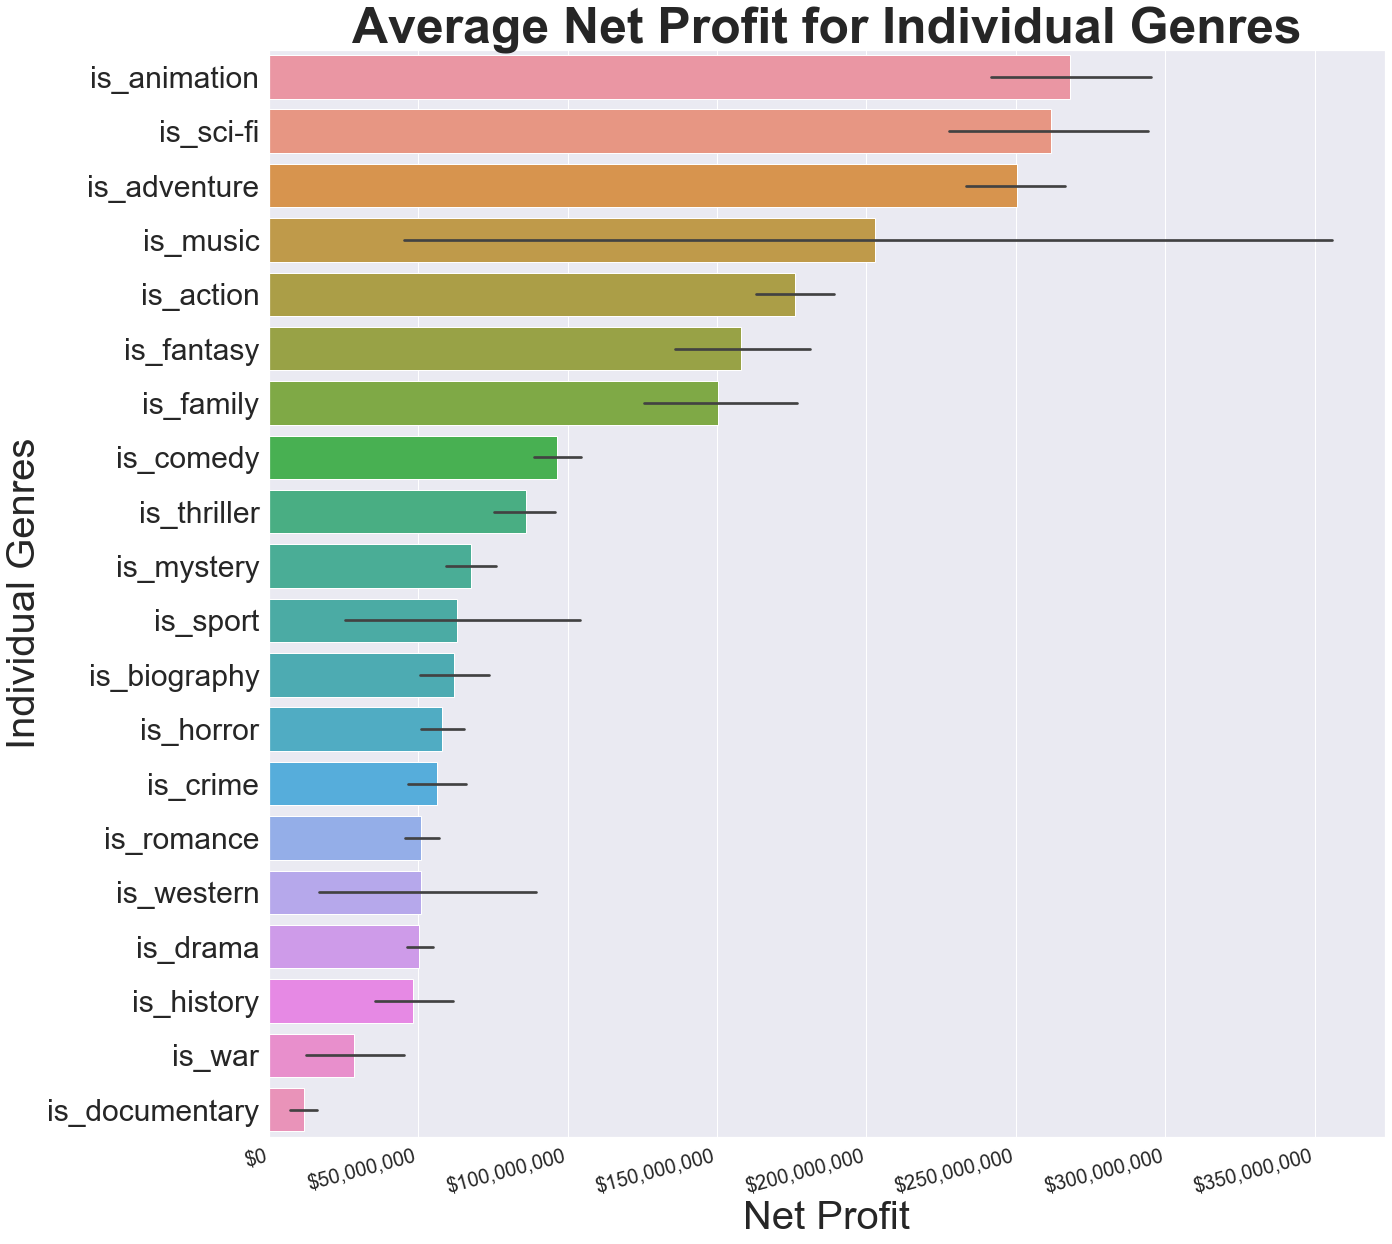

In [143]:
plt.figure(figsize=(20,20))
sns.set(style='darkgrid', font_scale=1.75)
ax = sns.barplot(data=profit_df, orient='h', ci=68)
ax.set_xlabel('Net Profit', fontsize=40)
ax.set_ylabel('Individual Genres', fontsize=40)
ax.set_title('Average Net Profit for Individual Genres', fontsize=50, weight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(),rotation=15, fontsize=20, ha='right')
#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);

## Answer:

### Here we see that out of all movies originating from the United States between the years 2010 and 2020 (that were within our datasets), in terms of genres that have the best Average Net profit - Sci-fi, Adventure, and Animation seem to be leading the pack with Action, Fantasy, and Family somewhat close behind.

C:\Users\Lewis\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Lewis\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


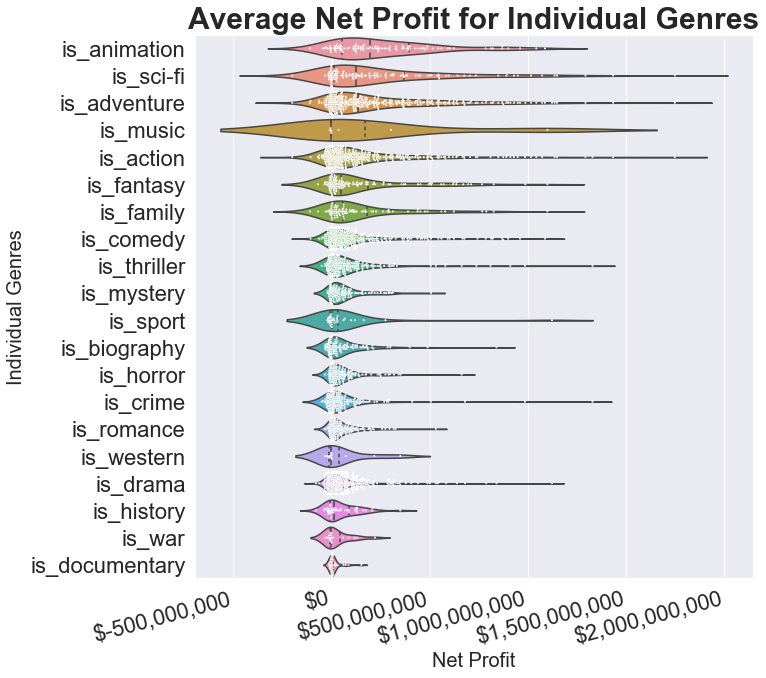

In [144]:
plt.figure(figsize=(10,10))
sns.set(style='darkgrid', font_scale=2)
sns.swarmplot(orient='h', size=2, color='white',data=profit_df)
ax = sns.violinplot(data=profit_df, orient='h', inner='quartiles', scale='width')
ax.set_title('Average Net Profit for Individual Genres', fontsize=30, weight='bold')
ax.set_ylabel('Individual Genres', fontsize=20)
ax.set_xlabel('Net Profit', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
ax.set_yticklabels(ax.get_yticklabels())
#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);

#### Above is a violin plot with boxplot markers. Because the KDE on almost all these genres seems to be skewed to the right (all have long right tails) their mean values will be greater than their median values.

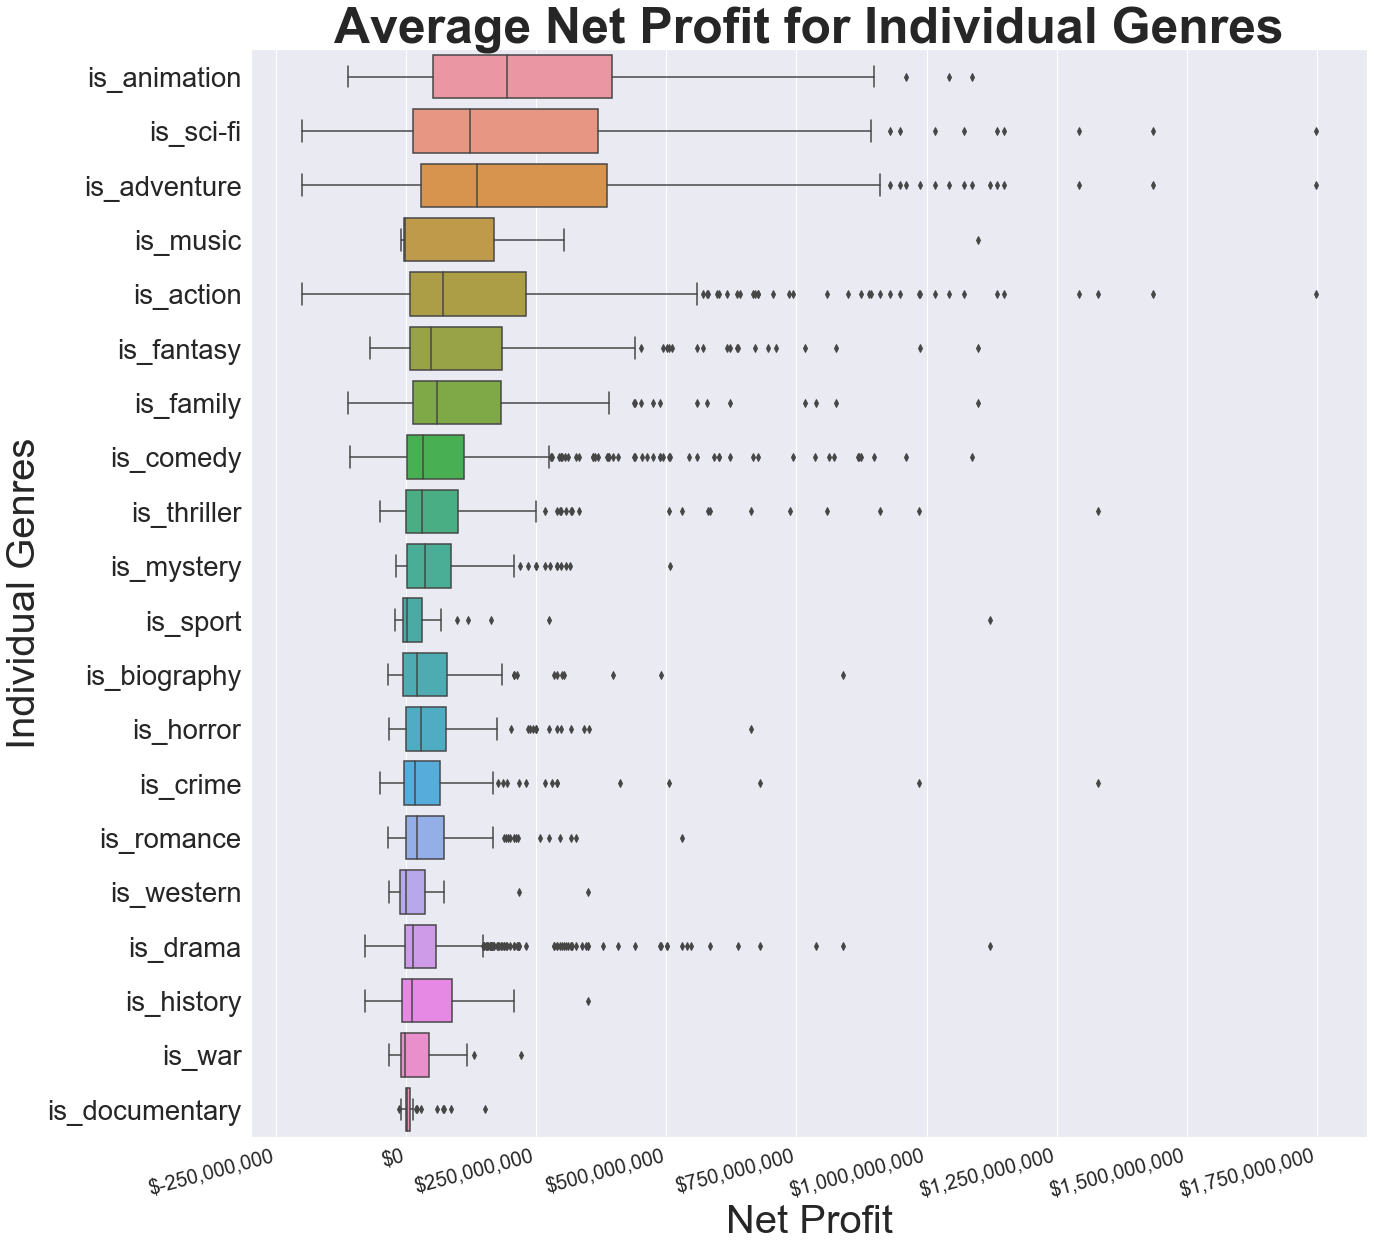

In [145]:
plt.figure(figsize=(20,20))
sns.set(style='darkgrid', font_scale=2.5)
#ax = sns.swarmplot(orient='h',data=profit_df)
ax = sns.boxplot(data=profit_df, orient='h')
ax.set_title('Average Net Profit for Individual Genres', fontsize=50, weight='bold')
ax.set_ylabel('Individual Genres', fontsize=40)
ax.set_xlabel('Net Profit', fontsize=40)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=15, ha='right')
#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);

#### The boxplot allows us to see values considered as outliers outside the plots themselves. This visualization allows us to view the median lines much easier.

### Average Production Budget for Individual Genres Within the past 10 years.

In [146]:
prod_buds = {}
for col in col_list:
    prod_buds[col] = indiv_genre_df.groupby(col).get_group(1).reset_index()['production_budget']


In [147]:
prod_budget_df = pd.DataFrame(prod_buds)

In [148]:
prod_budget_df = prod_budget_df.reindex(prod_budget_df.mean().sort_values(ascending=False).index, axis=1)

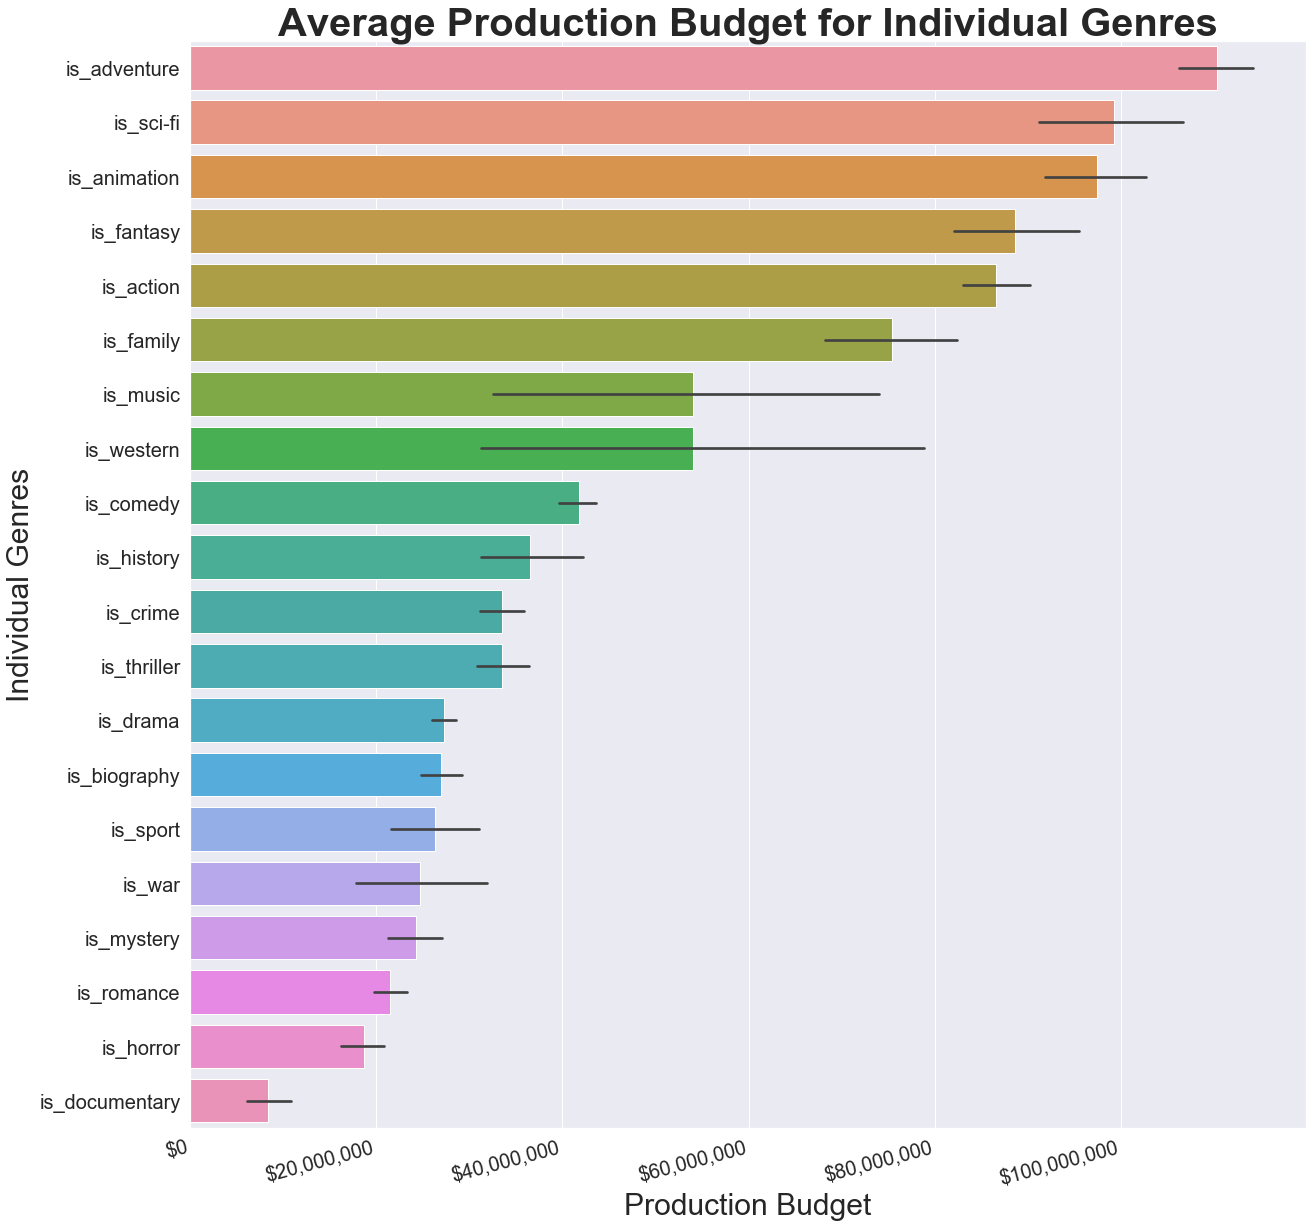

In [149]:
plt.figure(figsize=(20,20))
sns.set(style='darkgrid', font_scale=1.75)
ax = sns.barplot(data=prod_budget_df, orient='h', ci=68)
ax.set_xlabel('Production Budget', fontsize=30)
ax.set_ylabel('Individual Genres', fontsize=30)
ax.set_title('Average Production Budget for Individual Genres', fontsize=40, weight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=15, fontsize=20, ha='right')
#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);

## End Test Area

### Now that we've tried visualizing the tot_profit, let's visualize the percentage of worldwide profit based off of production budget for each genre.

In [150]:
perc_profits = {}
for col in col_list:
    perc_profits[col] = indiv_genre_df.groupby(col).get_group(1).reset_index()['ROI']

In [151]:
perc_profits_df = pd.DataFrame(perc_profits)
perc_profits_df.head()

is_biography  is_adventure   is_drama  is_documentary  is_mystery  \
0    294.769113    154.667286  53.551908       74.443075   40.193194   
1    289.870414    -57.210757  84.758115      158.502208  123.577303   
2    -10.306691    324.384139  40.193194      255.202731  221.958612   
3     74.443075    582.711400  93.834458      -54.531884   69.484870   
4    360.316131    118.648403   0.026547      -40.897943   28.110935   

   is_fantasy   is_sci-fi  is_romance   is_comedy    is_music   is_horror  \
0  154.667286  -57.210757   84.758115  125.568169  686.999816  179.744553   
1  118.648403  324.384139  174.763338  204.285342  360.316131  197.489166   
2   42.964126  582.711400  210.650574  410.607596  -12.811526   58.801779   
3  247.000112    2.828400  210.190293  434.439761   64.641227   -4.910428   
4  306.801427  356.027765  113.506906  271.794164  -90.503464  145.898193   

   is_western    is_crime  is_animation   is_action      is_war  is_history  \
0   -5.453776  393.938507    125.568169  154.667286  200.709137  -21.407805   
1  349.948323  699.327786    521.260356  -57.210757  162.894601  233.224912   
2   80.583507  388.134853    410.607596  324.384139  124.022184   74.443075   
3  -79.727798  404.130763    434.439761  582.711400  -88.830583  -88.276203   
4  620.791223  328.530754    271.794164  118.648403  468.134036  124.022184   

    is_family    is_sport  is_thriller  
0  306.801427  748.313273   193.206974  
1  412.745555  151.581268   294.341491  
2  145.179525  -20.301812   393.938507  
3  226.110043  327.183044   455.263490  
4  240.238634  122.601670   699.327786

In [152]:
perc_profits_df = perc_profits_df.reindex(perc_profits_df.mean().sort_values(ascending=False).index, axis=1)

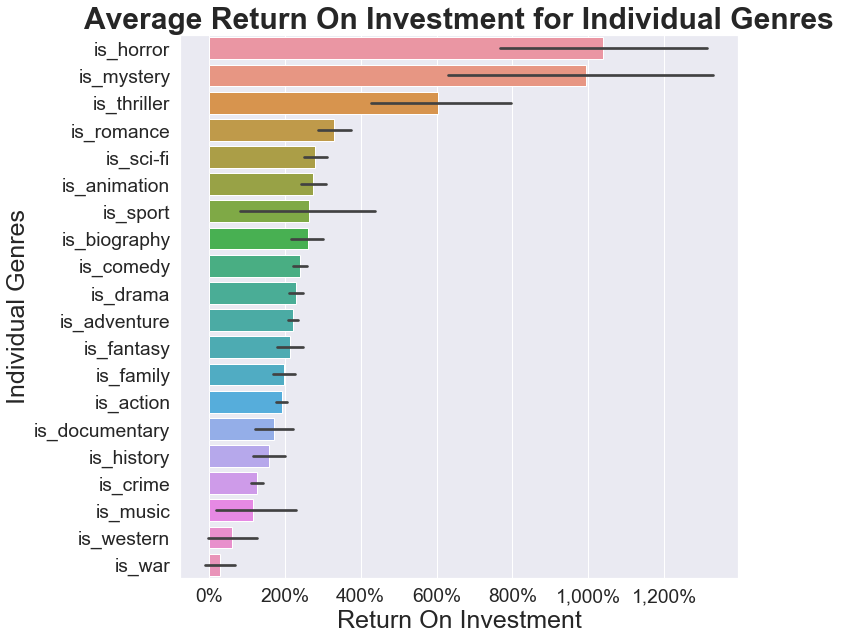

In [153]:
plt.figure(figsize=(10,10))
sns.set(style='darkgrid', font_scale=1.75)
ax = sns.barplot(data=perc_profits_df, orient='h', ci=68)
ax.set_xlabel('Return On Investment', fontsize=25)
ax.set_ylabel('Individual Genres', fontsize=25)
ax.set_title('Average Return On Investment for Individual Genres', weight='bold', fontsize=30)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_yticklabels(ax.get_yticklabels())

#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '{x:,.0f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);

### According to this barplot, the genres with the highest ROI are mystery, thriller, and horror.

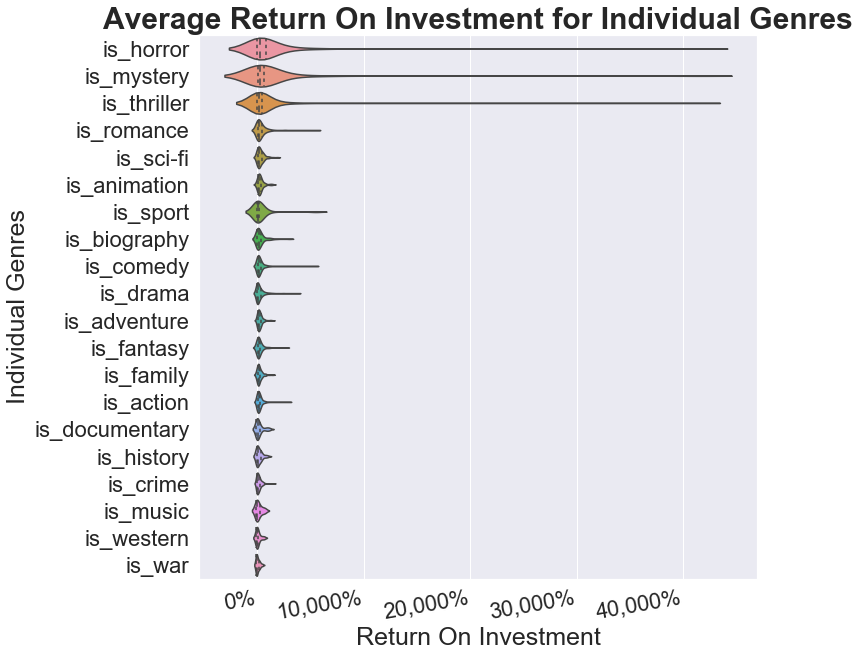

In [154]:
plt.figure(figsize=(10,10))
sns.set(style='darkgrid', font_scale=2)
#ax = sns.swarmplot(orient='h',data=perc_profits_df)
ax = sns.violinplot(data=perc_profits_df, orient='h', inner='quartiles', scale='width')
ax.set_title('Average Return On Investment for Individual Genres', fontsize=30, weight='bold')
ax.set_ylabel('Individual Genres', fontsize=25)
ax.set_xlabel('Return On Investment', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha='right')
ax.set_yticklabels(ax.get_yticklabels())
# ax.set(xlim=(-1000, 5000))
# sns.set(style='darkgrid')
# ax.set_xticks(range(-1000, 5000, 500));
#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '{x:,.0f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);

### Upon further analysis, we can see that those three genres have some major outliers compared to the rest of the genres.

#### Probably don't need the graph below

In [155]:
# plt.figure(figsize=(20, 20))
# sns.set(style='darkgrid', font_scale=2.5)
# #ax = sns.swarmplot(orient='h',data=profit_df)
# ax = sns.boxplot(data=perc_profits_df, orient='h')
# ax.set_title('Average Percent of Profit for Individual Genres', fontsize=50, weight='bold')
# ax.set_ylabel('Individual Genres', fontsize=40)
# ax.set_xlabel('Percent of Profit', fontsize=40)

# # ax.set(xlim=(-1000, 5000))
# # ax.set_xticks(range(-500, 5000, 1000));
# #Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
# fmt = '{x:,.0f}%'
# tick = mtick.StrMethodFormatter(fmt)
# ax.xaxis.set_major_formatter(tick);

## Grouped Genres

#### Let's join these two DataFrames to get movie budgets and genres together

In [156]:
imdb_title_basics_df.head(3)

tconst          primary_title        original_title  start_year  \
0  tt1699720  !Women Art Revolution  Women Art Revolution        2010   
1  tt2346170       #1 Serial Killer      #1 Serial Killer        2013   
2  tt3120962                     #5                    #5        2013   

   runtime_minutes                    genres  
0             83.0               Documentary  
1             87.0                    Horror  
2             68.0  Biography,Comedy,Fantasy

In [157]:
tn_movie_budget_df.head(3)

id  release_date                                primary_title  \
0   1          2009                                       Avatar   
1   2          2011  Pirates of the Caribbean: On Stranger Tides   
2   3          2019                                 Dark Phoenix   

   production_budget  domestic_gross  worldwide_gross  
0        425000000.0     760507625.0     2.776345e+09  
1        410600000.0     241063875.0     1.045664e+09  
2        350000000.0      42762350.0     1.497624e+08

#### These are not filtered  by region = 'US'. Originally had that, but there were too few grouped genre categories.

In [158]:
new_df = pysqldf("""SELECT i.tconst, i.genres, i.runtime_minutes, t.*
                    FROM tn_movie_budget_df t
                    JOIN imdb_title_basics_clean i
                    USING(primary_title)
                    WHERE (release_date > 2009 AND release_date <= 2020)
                           AND (worldwide_gross != 0)
                           AND (production_budget > 0);""")

In [159]:
new_df = new_df.drop(columns='id')

#### According to the line below, there are 83 grouped genres that pertain to only 1 movie each.

In [160]:
(new_df['genres'].value_counts() == 1).sum()

83

#### Let's make a new column in our new_df called 'tot_profit' that calculates the total profit for each movie by subtracting the production budget from the worldwide gross and 'ROI' that calculates the total percentage between production_budget and worldwide_gross

In [161]:
new_df['tot_profit'] = new_df['worldwide_gross'] - new_df['production_budget']

In [162]:
new_df['ROI'] = (new_df['worldwide_gross']/new_df['production_budget']) * 100

In [163]:
#new_df = new_df[new_df['release_date'] <= 2020]

In [164]:
new_df.head()

tconst                    genres  runtime_minutes  release_date  \
0  tt1298650  Action,Adventure,Fantasy            136.0          2011   
1  tt6565702   Action,Adventure,Sci-Fi            113.0          2019   
2  tt2395427   Action,Adventure,Sci-Fi            141.0          2015   
3  tt4154756   Action,Adventure,Sci-Fi            149.0          2018   
4  tt0974015  Action,Adventure,Fantasy            120.0          2017   

                                 primary_title  production_budget  \
0  Pirates of the Caribbean: On Stranger Tides        410600000.0   
1                                 Dark Phoenix        350000000.0   
2                      Avengers: Age of Ultron        330600000.0   
3                       Avengers: Infinity War        300000000.0   
4                               Justice League        300000000.0   

   domestic_gross  worldwide_gross    tot_profit         ROI  
0     241063875.0     1.045664e+09  6.350639e+08  254.667286  
1      42762350.0     1.497624e+08 -2.002376e+08   42.789243  
2     459005868.0     1.403014e+09  1.072414e+09  424.384139  
3     678815482.0     2.048134e+09  1.748134e+09  682.711400  
4     229024295.0     6.559452e+08  3.559452e+08  218.648403

## Ignore

#### FIX THIS Now let's make a new graph that groups the data in new_df by 'genres' and gives us the mean, median, min, and max values of 'tot_profit' for each genre.

In [165]:
#graph_df = new_df.groupby('genres').tot_profit.describe()

In [166]:
#graph_df.head()

In [167]:
#graph_df.reset_index(inplace=True)

#### We are going to make a new df called 'graph_df' strictly for using in a graph, and we are only looking at the top 25 grouped genres using mean and median values of 'tot_profit' by sorting the values of graph_df['mean] and graph_df['50%'] and setting the parameter ascending equal to False.

In [168]:
# plt.figure(figsize=(20,15))
# sns.set(style='darkgrid', font_scale=2)
# ax = sns.barplot(x='mean', y='genres', data=graph_df.sort_values('mean', ascending=False).head(25))
# ax.set_title("Average Total Profit In Top 25 Grouped Genres", fontsize=30)
# ax.set_xlabel('Average Profit (1.0 = 1 Billion Dollars)', fontsize=25)
# ax.set_ylabel('Top 25 Genres', fontsize=25)
# ax.set(xlim=(0, 1300000000))
# ax.set_xticks(range(0, 1300000000, 100000000))

# plt.show()
# plt.close()

#### Here we see the sorted average Total Profit in the top 25 grouped genres. Now Let's do the same thing with median.

In [169]:
# plt.figure(figsize=(20,15))
# sns.set(font_scale=1.8)
# ax = sns.barplot(x='50%', y='genres', data=graph_df.sort_values('50%', ascending=False).head(25))
# ax.set_title("Median Total Profit In Top 25 Grouped Genres", fontsize=25)
# ax.set_xlabel('Median Profit (1.0 = 1 Billion Dollars)', fontsize=20)
# ax.set_ylabel('Top 25 Genres', fontsize=20)
# ax.set(xlim=(0, 1300000000))
# sns.set(style='darkgrid')
# ax.set_xticks(range(0, 1300000000, 100000000))
# plt.show()

#### So it seems like Fantasy/Romance and Adventure/Drama/Sport are the Top Grouped Genres according to both the mean and median graphs. Just to be safe, let's take a look at the frequency of movies each of the top 25 grouped genres have within 'new_df'.

In [170]:
# for genre in graph_df['genres'].head(25):
#     test = new_df['genres'] == genre
#     print(f"{genre} : Frequency = {test.sum()}")

#### Just like we thought, many genres contain only 1 movie for that genre, and some happened to do well which ended up distorting the results of the graph. Let's set a threshold which allows only grouped genres that have 25 or more movies within that genre to be counted in the graphs.

In [171]:
# genre_freq = {}
# for genre in new_df['genres']:
#     genre_freq[genre] = genre_freq.get(genre, 0) + 1
# genre_freq_df = pd.DataFrame()

In [172]:
# genre_freq_df = genre_freq_df.append(genre_freq, ignore_index=True).transpose()

In [173]:
#genre_freq_df.reset_index(inplace=True)

In [174]:
# genre_freq_df = genre_freq_df.rename(columns={"index": "genres", 0: "freq"})
# genre_freq_df.head()

In [175]:
# limit_graph_df = pysqldf("""SELECT *
#                            FROM graph_df
#                            WHERE(count>=25)
#                            ORDER BY mean DESC;""")

In [176]:
new_df.head()

tconst                    genres  runtime_minutes  release_date  \
0  tt1298650  Action,Adventure,Fantasy            136.0          2011   
1  tt6565702   Action,Adventure,Sci-Fi            113.0          2019   
2  tt2395427   Action,Adventure,Sci-Fi            141.0          2015   
3  tt4154756   Action,Adventure,Sci-Fi            149.0          2018   
4  tt0974015  Action,Adventure,Fantasy            120.0          2017   

                                 primary_title  production_budget  \
0  Pirates of the Caribbean: On Stranger Tides        410600000.0   
1                                 Dark Phoenix        350000000.0   
2                      Avengers: Age of Ultron        330600000.0   
3                       Avengers: Infinity War        300000000.0   
4                               Justice League        300000000.0   

   domestic_gross  worldwide_gross    tot_profit         ROI  
0     241063875.0     1.045664e+09  6.350639e+08  254.667286  
1      42762350.0     1.497624e+08 -2.002376e+08   42.789243  
2     459005868.0     1.403014e+09  1.072414e+09  424.384139  
3     678815482.0     2.048134e+09  1.748134e+09  682.711400  
4     229024295.0     6.559452e+08  3.559452e+08  218.648403

## End Ignore

In [177]:
len(new_df)

2126

#### Make a list called group_cols that appends every unique value within the genres column 

In [178]:
group_cols = [col for col in new_df['genres'].unique()]

In [179]:
new_dict = {}
gb = new_df.groupby('genres')
# gb.get_group('Action,Animation,Comedy')['tot_profit']
for genre in group_cols:
    new_dict[genre] = gb.get_group(genre).reset_index()['tot_profit']

#### Turn dictionary into a dataframe

In [180]:
grouped_profit_df = pd.DataFrame(new_dict)

In [181]:
grouped_profit_df.head()

Action,Adventure,Fantasy  Action,Adventure,Sci-Fi  \
0               635063875.0            -2.002376e+08   
1               355945209.0             1.072414e+09   
2               118151347.0             1.748134e+09   
3               617500281.0             7.778100e+06   
4               558241137.0             8.900694e+08   

   Action,Adventure,Thriller  Action,Thriller  Action,Adventure,Western  \
0                579620923.0      809439099.0               -14997885.0   
1                112459006.0      296168316.0                72525156.0   
2                910526981.0       70720921.0                -3282693.0   
3                155355920.0      212249198.0                       NaN   
4                179115534.0      102878928.0                       NaN   

   Adventure,Animation,Comedy  Adventure,Family,Fantasy  Adventure,Fantasy  \
0                 326477240.0               767003568.0        710366855.0   
1                 821215193.0               825491110.0        695577621.0   
2                 868879522.0               290359051.0          2687603.0   
3                 543588329.0               452220086.0                NaN   
4                 360155383.0               622402853.0                NaN   

   Action,Crime,Thriller  Action,Adventure,Comedy  ...  \
0           9.848463e+08              439213485.0  ...   
1           1.328723e+09              666980024.0  ...   
2           5.051635e+08              600867516.0  ...   
3           1.134531e+08              110328374.0  ...   
4          -4.590954e+06              493144660.0  ...   

   Comedy,Fantasy,Musical  Documentary,Drama,History  Horror,Sci-Fi  \
0              -1997564.0                 -1159068.0     -1614407.0   
1                     NaN                 -1323738.0            NaN   
2                     NaN                  5139730.0            NaN   
3                     NaN                        NaN            NaN   
4                     NaN                        NaN            NaN   

   Documentary,History,War  Comedy,Horror,Mystery  Adventure,Horror  \
0                1092308.0             -1263137.0        11931420.0   
1                      NaN                    NaN               NaN   
2                      NaN                    NaN               NaN   
3                      NaN                    NaN               NaN   
4                      NaN                    NaN               NaN   

   Adventure,Biography,Documentary  Comedy,Fantasy,Thriller  \
0                        -711243.0                -486267.0   
1                              NaN                      NaN   
2                              NaN                      NaN   
3                              NaN                      NaN   
4                              NaN                      NaN   

   Action,Biography,Documentary  Biography,Documentary,Music  
0                     -498178.0                     -79944.0  
1                           NaN                          NaN  
2                           NaN                          NaN  
3                           NaN                          NaN  
4                           NaN                          NaN  

[5 rows x 274 columns]

In [182]:
len(grouped_profit_df.columns)

274

In [183]:
grouped_profit_df = grouped_profit_df.reindex(grouped_profit_df.mean().sort_values(ascending=False).index, axis=1)

#### Filtering out Grouped Genres that have a movie count of less than 15.

In [184]:
for col in grouped_profit_df:
    if grouped_profit_df[col].describe()['count'] < 15:
        grouped_profit_df = grouped_profit_df.drop(columns=col)
    else:
        continue
grouped_profit_df.describe()

Action,Adventure,Sci-Fi  Action,Adventure,Animation  \
count             5.300000e+01                1.700000e+01   
mean              4.760434e+08                3.222576e+08   
std               4.197517e+08                2.601914e+08   
min              -2.002376e+08               -2.935140e+07   
25%               1.679166e+08                1.142478e+08   
50%               3.690761e+08                3.775991e+08   
75%               7.051664e+08                4.380684e+08   
max               1.748134e+09                1.042521e+09   

       Adventure,Animation,Comedy  Action,Adventure,Comedy  \
count                6.900000e+01             2.500000e+01   
mean                 2.947854e+08             2.705272e+08   
std                  2.973197e+08             2.824711e+08   
min                 -3.585151e+07            -1.069000e+08   
25%                  6.471712e+07             1.585218e+07   
50%                  1.788479e+08             2.391462e+08   
75%                  3.975198e+08             4.392135e+08   
max                  1.122470e+09             8.744962e+08   

       Action,Adventure,Fantasy  Action,Crime,Thriller  Action,Thriller  \
count              3.500000e+01           2.400000e+01     2.000000e+01   
mean               2.304667e+08           1.408030e+08     1.246050e+08   
std                2.578842e+08           3.361813e+08     1.953436e+08   
min               -2.664387e+07          -5.033500e+07    -2.490888e+07   
25%                2.106865e+07          -6.889198e+06     4.180598e+06   
50%                1.433886e+08           1.668186e+07     5.428272e+07   
75%                3.721435e+08           1.171323e+08     1.544579e+08   
max                9.868946e+08           1.328723e+09     8.094391e+08   

                N/A  Horror,Mystery,Thriller  Action,Adventure,Drama  ...  \
count  1.900000e+01             3.700000e+01            2.900000e+01  ...   
mean   1.132652e+08             8.779402e+07            8.767324e+07  ...   
std    2.048105e+08             8.649343e+07            1.361975e+08  ...   
min   -7.944858e+07            -2.365923e+07           -6.448372e+07  ...   
25%    4.631540e+05             3.074923e+07           -6.496851e+06  ...   
50%    2.200463e+07             6.336420e+07            4.784919e+07  ...   
75%    1.433371e+08             1.200103e+08            1.214997e+08  ...   
max    6.792360e+08             2.980001e+08            5.406446e+08  ...   

        Documentary  Biography,Comedy,Drama  Drama,Thriller  \
count  1.020000e+02            2.000000e+01    2.900000e+01   
mean   3.901065e+07            3.524653e+07    2.987420e+07   
std    1.045770e+08            7.135562e+07    7.484742e+07   
min   -3.165737e+07           -3.212508e+07   -2.365923e+07   
25%   -1.286535e+06            5.349608e+06   -4.925361e+06   
50%    4.231260e+06            1.161142e+07    4.221211e+06   
75%    3.730142e+07            3.793973e+07    2.383071e+07   
max    8.254911e+08            2.990344e+08    3.182667e+08   

       Comedy,Drama,Romance  Comedy,Drama         Drama  \
count          6.700000e+01  6.500000e+01  1.740000e+02   
mean           2.814452e+07  2.813802e+07  2.628883e+07   
std            5.135097e+07  4.351037e+07  6.450728e+07   
min           -7.944858e+07 -2.345527e+07 -7.944858e+07   
25%           -6.664030e+05 -9.848440e+05 -3.866558e+06   
50%            5.733666e+06  1.214162e+07  1.862998e+06   
75%            4.066859e+07  4.517894e+07  3.582118e+07   
max            2.154125e+08  1.635498e+08  3.975198e+08   

       Action,Drama,Thriller  Comedy,Crime,Drama  Action,Crime,Drama  \
count           1.800000e+01        1.500000e+01        4.600000e+01   
mean            2.574403e+07        2.474509e+07        2.312713e+07   
std             3.112574e+07        4.186392e+07        4.720956e+07   
min            -1.680049e+07       -6.617054e+06       -4.322557e+07   
25%            -1.306412e+06       -1.653651e+06       -7.8

In [185]:
grouped_profit_df = grouped_profit_df.drop(columns='N/A')

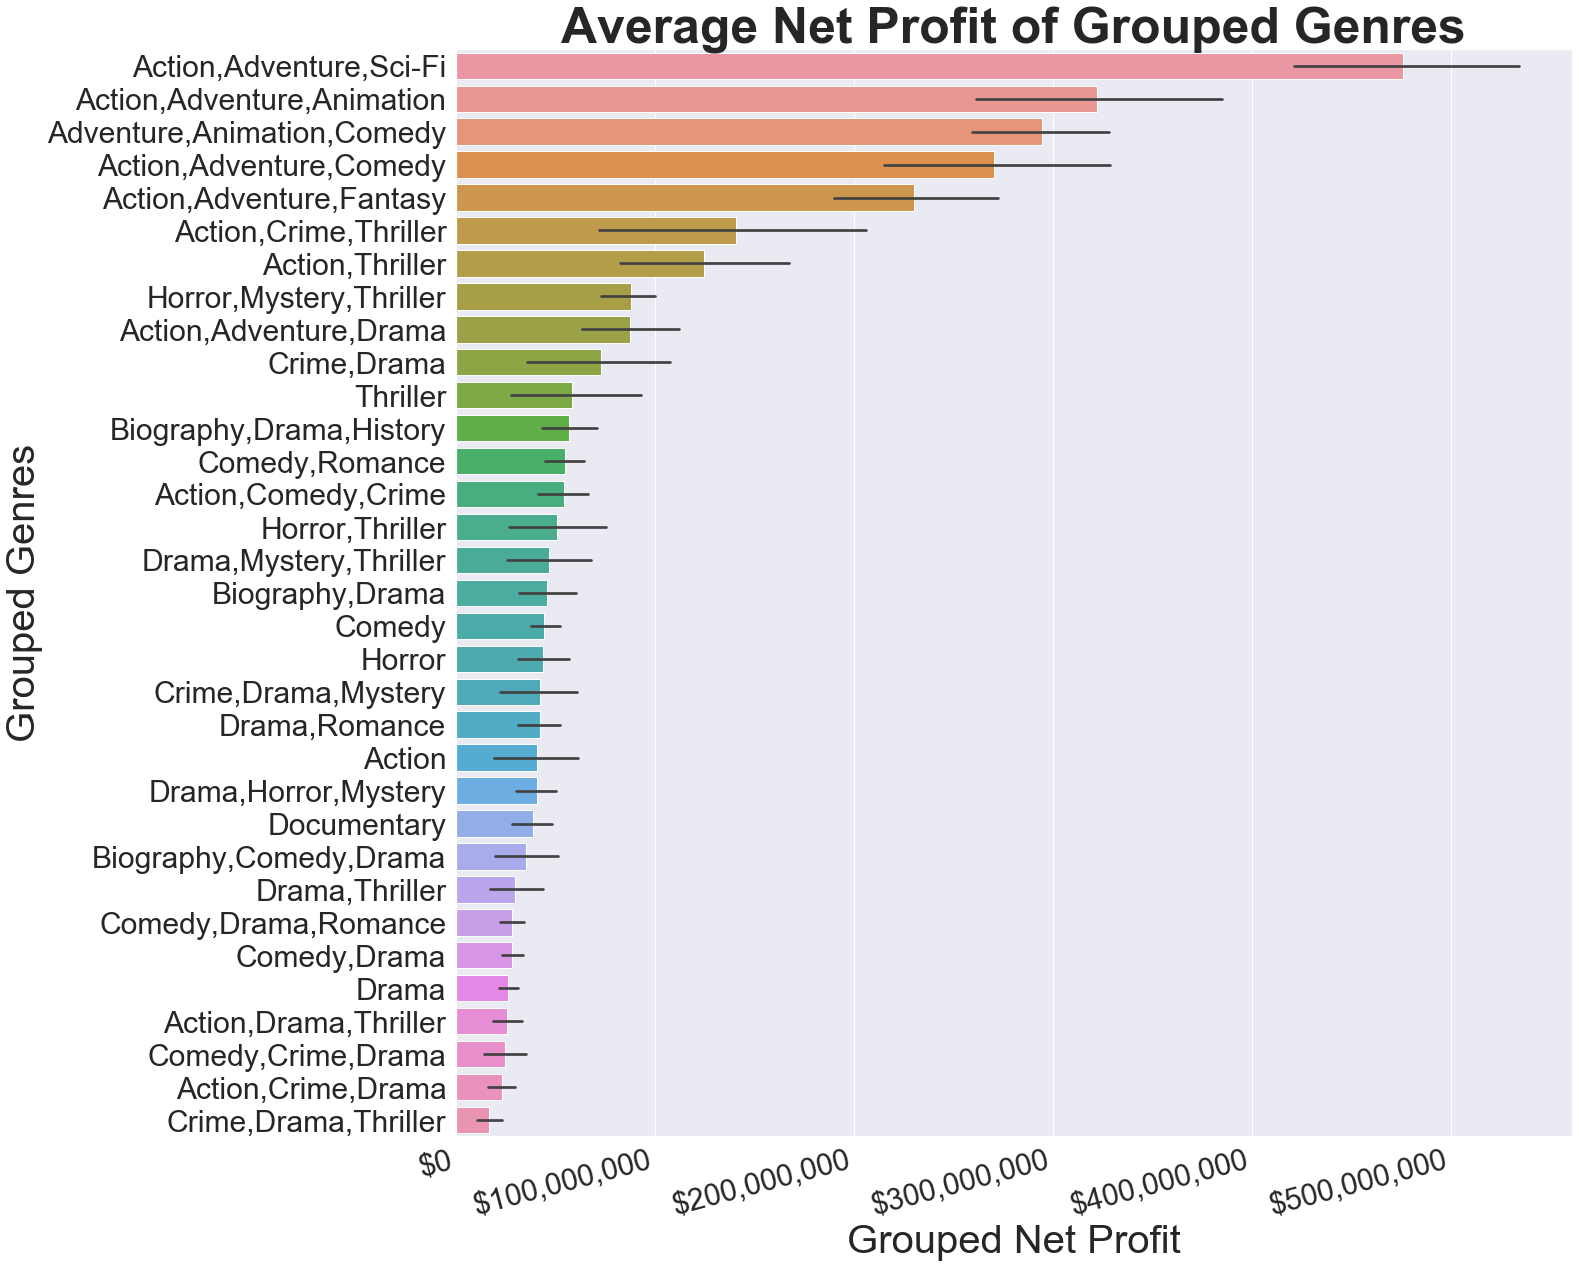

In [186]:
plt.figure(figsize=(20,20))
sns.set(style='darkgrid', font_scale=2)
ax = sns.barplot(data=grouped_profit_df, orient='h', ci=68)
ax.set_xlabel('Grouped Net Profit', fontsize=40)
ax.set_ylabel('Grouped Genres', fontsize=40)
ax.set_title('Average Net Profit of Grouped Genres', fontsize=50, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, fontsize=30, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=30)
#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);
# ax.set(xlim=(0, 600000000))
# ax.set_xticks(range(0, 600000000, 50000000));

C:\Users\Lewis\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Lewis\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


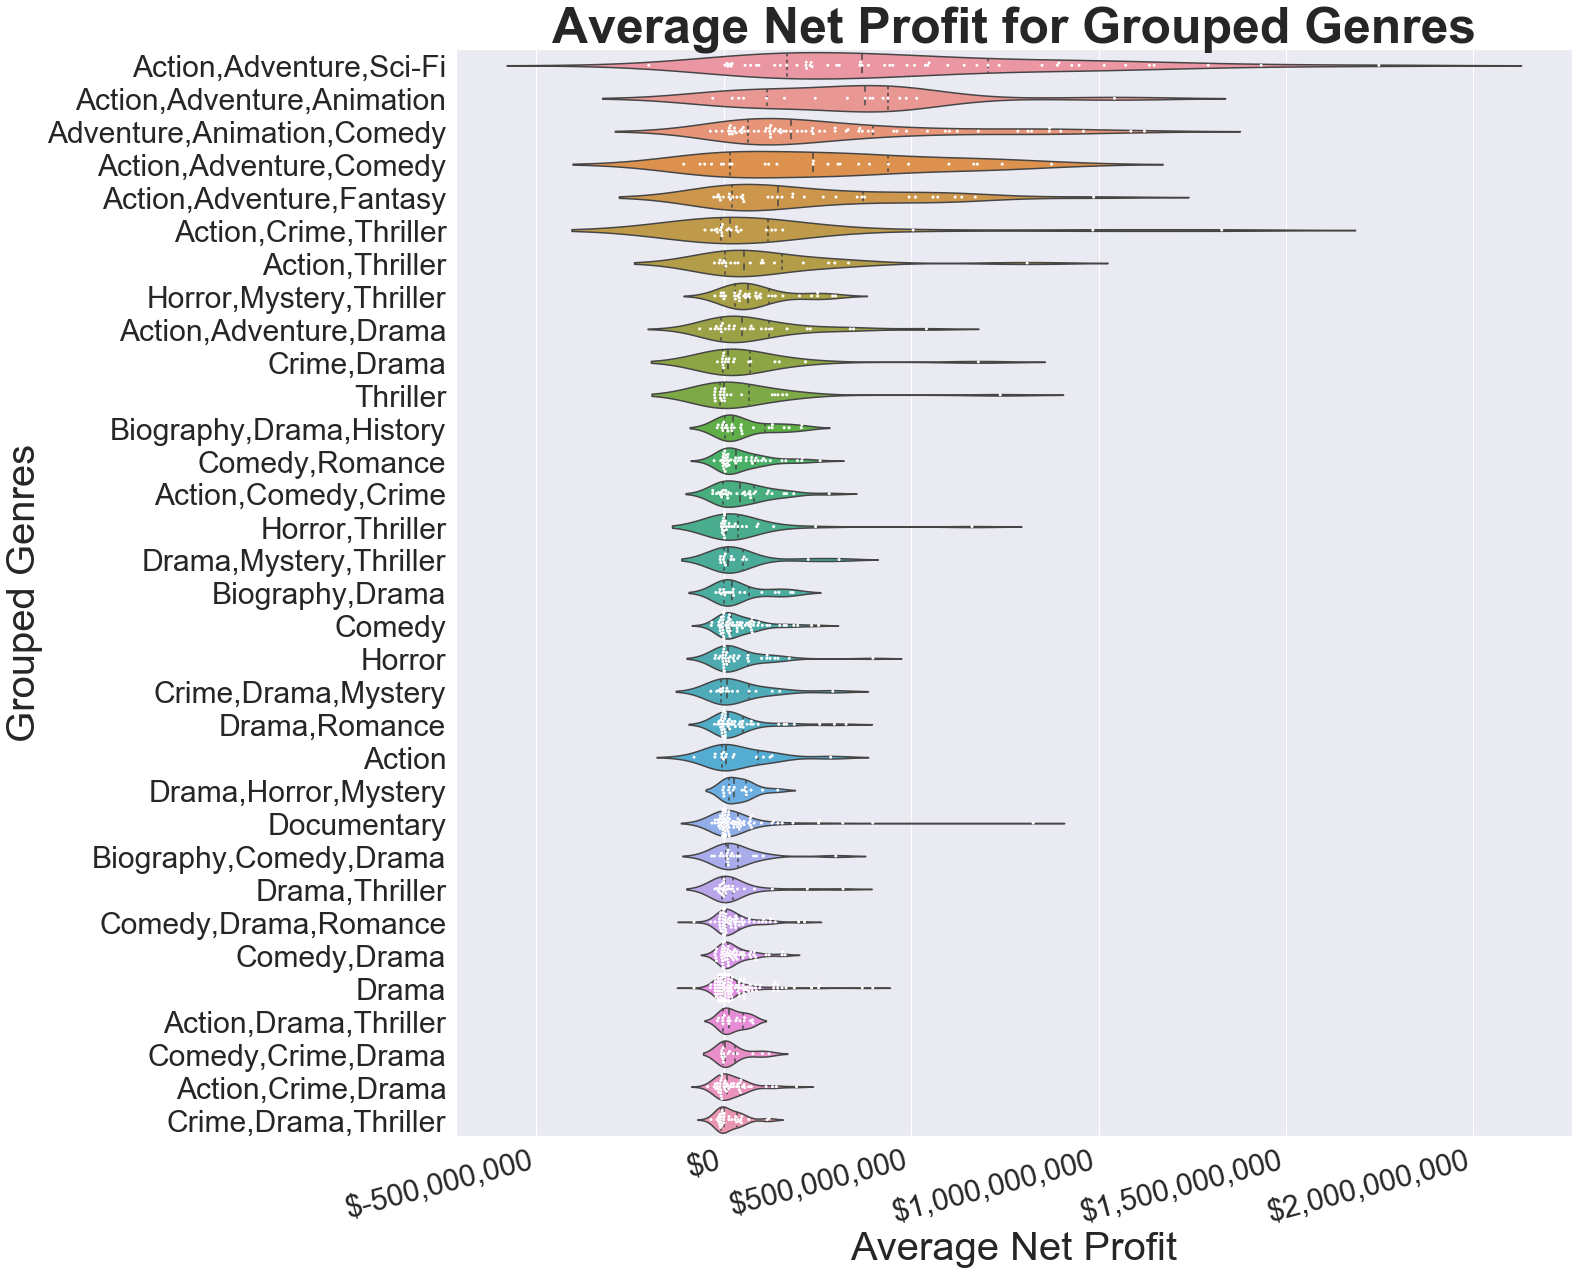

In [187]:
plt.figure(figsize=(20,20))
sns.set(style='darkgrid', font_scale=1.75)
sns.swarmplot(data=grouped_profit_df, orient='h', size=3, color='white')
ax = sns.violinplot(data=grouped_profit_df, inner='quartiles', orient='h', scale='width')
ax.set_title('Average Net Profit for Grouped Genres', fontsize=50, weight='bold')
ax.set_xlabel('Average Net Profit', fontsize=40)
ax.set_ylabel('Grouped Genres', fontsize=40)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, fontsize=30, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=30)
#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);
#ax.set(xlim=(0, 600000000))
#ax.set_xticks(range(0, 600000000, 50000000));

## Test Area

In [188]:
prod_dict = {}
gb = new_df.groupby('genres')
# gb.get_group('Action,Animation,Comedy')['tot_profit']
for genre in group_cols:
    prod_dict[genre] = gb.get_group(genre).reset_index()['production_budget']

In [189]:
grp_prod_bud_df = pd.DataFrame(prod_dict)

In [190]:
grp_prod_bud_df.head()

Action,Adventure,Fantasy  Action,Adventure,Sci-Fi  \
0               410600000.0              350000000.0   
1               300000000.0              330600000.0   
2               275000000.0              300000000.0   
3               250000000.0              275000000.0   
4               230000000.0              250000000.0   

   Action,Adventure,Thriller  Action,Thriller  Action,Adventure,Western  \
0                300000000.0      275000000.0               275000000.0   
1                210000000.0      120000000.0                90000000.0   
2                200000000.0       95000000.0                 4500000.0   
3                125000000.0       92000000.0                       NaN   
4                125000000.0       70000000.0                       NaN   

   Adventure,Animation,Comedy  Adventure,Family,Fantasy  Adventure,Fantasy  \
0                 260000000.0               250000000.0        250000000.0   
1                 200000000.0               200000000.0        250000000.0   
2                 200000000.0               200000000.0        195000000.0   
3                 200000000.0               200000000.0                NaN   
4                 200000000.0               180000000.0                NaN   

   Action,Crime,Thriller  Action,Adventure,Comedy  ...  \
0            250000000.0              215000000.0  ...   
1            190000000.0              180000000.0  ...   
2            125000000.0              170000000.0  ...   
3             77000000.0              135000000.0  ...   
4             70000000.0              130000000.0  ...   

   Comedy,Fantasy,Musical  Documentary,Drama,History  Horror,Sci-Fi  \
0               2000000.0                  1900000.0      1900000.0   
1                     NaN                  1500000.0            NaN   
2                     NaN                   500000.0            NaN   
3                     NaN                        NaN            NaN   
4                     NaN                        NaN            NaN   

   Documentary,History,War  Comedy,Horror,Mystery  Adventure,Horror  \
0                1500000.0              1500000.0         1000000.0   
1                      NaN                    NaN               NaN   
2                      NaN                    NaN               NaN   
3                      NaN                    NaN               NaN   
4                      NaN                    NaN               NaN   

   Adventure,Biography,Documentary  Comedy,Fantasy,Thriller  \
0                        1000000.0                 900000.0   
1                              NaN                      NaN   
2                              NaN                      NaN   
3                              NaN                      NaN   
4                              NaN                      NaN   

   Action,Biography,Documentary  Biography,Documentary,Music  
0                      500000.0                     100000.0  
1                           NaN                          NaN  
2                           NaN                          NaN  
3                           NaN                          NaN  
4                           NaN                          NaN  

[5 rows x 274 columns]

In [191]:
for col in grp_prod_bud_df:
    if grp_prod_bud_df[col].describe()['count'] < 15:
        grp_prod_bud_df = grp_prod_bud_df.drop(columns=col)
    else:
        continue

In [192]:
#grp_prod_bud_df = grp_prod_bud_df.drop(columns='N/A')

In [193]:
grp_prod_bud_df = grp_prod_bud_df.reindex(grp_prod_bud_df.mean().sort_values(ascending=False).index, axis=1)

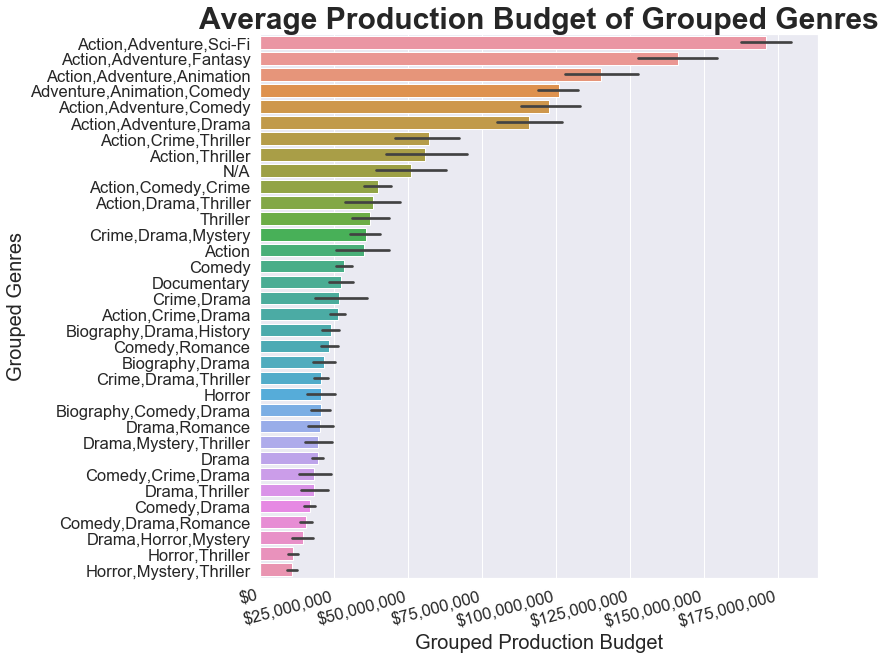

In [194]:
plt.figure(figsize=(10,10))
sns.set(style='darkgrid', font_scale=1.50)
ax = sns.barplot(data=grp_prod_bud_df, orient='h', ci=68)
ax.set_xlabel('Grouped Production Budget', fontsize=20)
ax.set_ylabel('Grouped Genres', fontsize=20)
ax.set_title('Average Production Budget of Grouped Genres', fontsize=30, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
ax.set_yticklabels(ax.get_yticklabels())
#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);

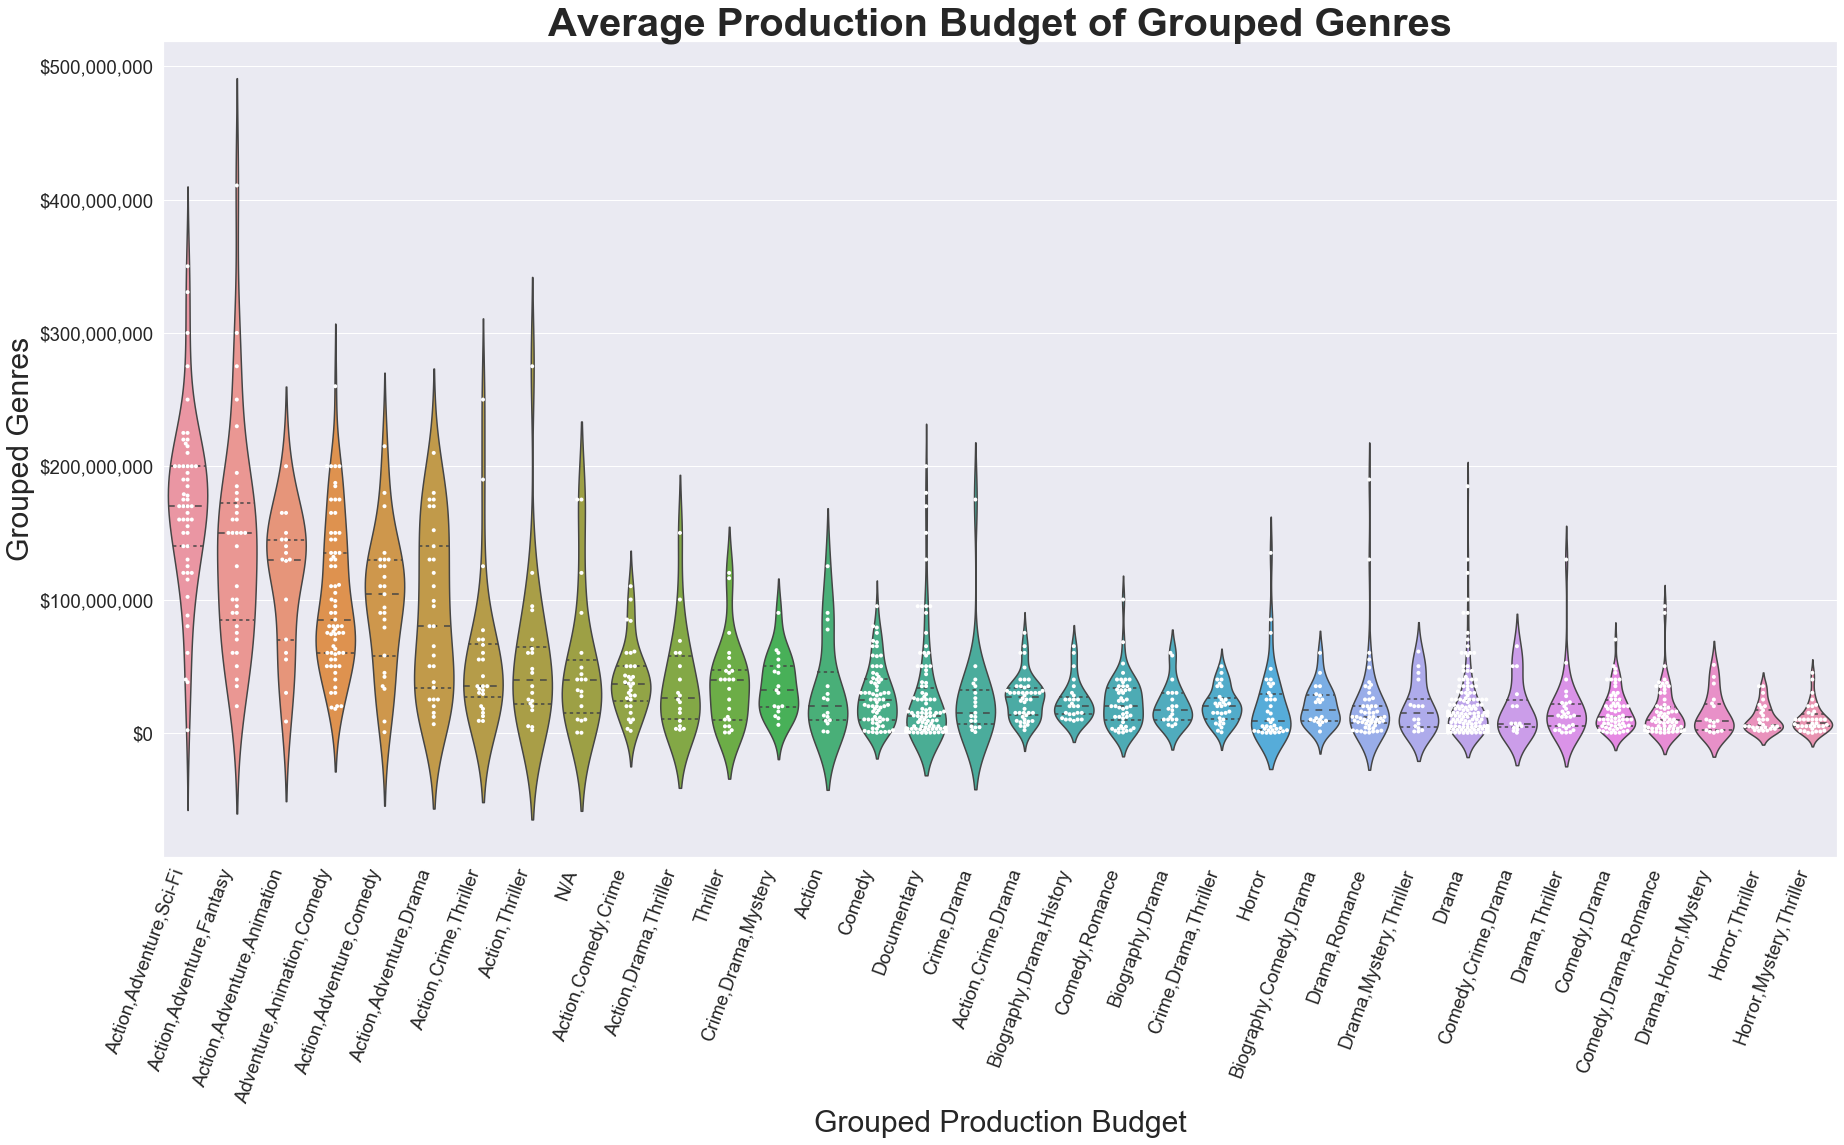

In [195]:
plt.figure(figsize=(30,15))
sns.set(style='darkgrid', font_scale=1.70)
sns.swarmplot(data=grp_prod_bud_df, size=4, color='white')
ax = sns.violinplot(data=grp_prod_bud_df, inner='quartiles', ci=68, scale='width')
ax.set_xlabel('Grouped Production Budget', fontsize=30)
ax.set_ylabel('Grouped Genres', fontsize=30)
ax.set_title('Average Production Budget of Grouped Genres', fontsize=40, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha='right')
ax.set_yticklabels(ax.get_yticklabels())
#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick);

## End Test Area

In [196]:
perc_dict = {}
gb = new_df.groupby('genres')
for genre in group_cols:
    perc_dict[genre] = gb.get_group(genre)['ROI']

In [197]:
perc_group_prof_df = pd.DataFrame(perc_dict)

In [198]:
for col in perc_group_prof_df:
    if perc_group_prof_df[col].describe()['count'] < 15:
        perc_group_prof_df = perc_group_prof_df.drop(columns=col)
    else:
        continue
perc_group_prof_df.describe()

Action,Adventure,Fantasy  Action,Adventure,Sci-Fi  Action,Thriller  \
count                 35.000000                53.000000        20.000000   
mean                 237.471678               384.854737       287.844517   
std                  148.547171               209.151061       250.971763   
min                    8.516405                42.789243         0.364464   
25%                  119.588469               237.044727       122.211721   
50%                  218.648403               354.498168       240.974408   
75%                  303.573042               524.551428       358.690570   
max                  716.809150               859.371700       856.890320   

       Adventure,Animation,Comedy  Action,Crime,Thriller  \
count                   69.000000              24.000000   
mean                   390.069162             208.655245   
std                    306.082512             197.178385   
min                     40.247480               0.013800   
25%                    186.577085              48.774117   
50%                    296.921458             159.168159   
75%                    456.004629             308.330760   
max                   1568.021855             799.327786   

       Action,Adventure,Comedy  Action,Adventure,Drama  \
count                25.000000               29.000000   
mean                365.788420              193.585689   
std                 321.252705              147.448595   
min                   0.355600                0.048446   
25%                 137.743279               86.837066   
50%                 365.867558              155.974192   
75%                 430.384813              271.408512   
max                1381.078609              687.475292   

       Action,Adventure,Animation  Documentary  Drama,Romance  ...  \
count                   17.000000   102.000000      55.000000  ...   
mean                   410.098117   252.180665     403.856237  ...   
std                    323.595224   352.343559     574.038039  ...   
min                      2.161997     0.013800       0.364464  ...   
25%                    211.655794    28.661027      56.420905  ...   
50%                    395.228987   145.071336     173.590865  ...   
75%                    426.913444   282.036908     479.393251  ...   
max                   1444.091235  1967.778200    2717.924114  ...   

       Comedy,Drama  Biography,Drama,History  Comedy,Crime,Drama  \
count     65.000000                26.000000           15.000000   
mean     342.967132               317.016431          185.874299   
std      474.171264               258.488996          183.091699   
min        0.453745                 0.412313            0.359733   
25%       51.976215               125.874132           61.585020   
50%      212.177811               215.058427          152.635417   
75%      428.445353               421.829464          259.215815   
max     2575.494167               927.086864          622.985020   

       Drama,Mystery,Thriller  Biography,Drama  Biography,Comedy,Drama  \
count               16.000000        20.000000               20.000000   
mean               392.859794       345.256328              364.832221   
std                419.915350       368.769049              380.520222   
min                  0.687000        29.289173                0.584596   
25%                103.851912        97.278369              109.768576   
50%                193.405014       210.822850              221.947609   
75%                558.970452       438.732029              478.952781   
max               1226.517525      1246.422667             1400.149735   

       Drama,Horror,Mystery  Crime,Drama,Thriller  Horror,Mystery,Thriller  \
count             17.000000             31.000000                37.000000   
mean             654.146860            165.412317              2760.670329   
std              798.796814            161.399081              6809.418525   
min               12.22142

In [199]:
perc_group_prof_df.head()

Action,Adventure,Fantasy  Action,Adventure,Sci-Fi  Action,Thriller  \
0                254.667286                      NaN              NaN   
1                       NaN                42.789243              NaN   
2                       NaN               424.384139              NaN   
3                       NaN               682.711400              NaN   
4                218.648403                      NaN              NaN   

   Adventure,Animation,Comedy  Action,Crime,Thriller  Action,Adventure,Comedy  \
0                         NaN                    NaN                      NaN   
1                         NaN                    NaN                      NaN   
2                         NaN                    NaN                      NaN   
3                         NaN                    NaN                      NaN   
4                         NaN                    NaN                      NaN   

   Action,Adventure,Drama  Action,Adventure,Animation  Documentary  \
0                     NaN                         NaN          NaN   
1                     NaN                         NaN          NaN   
2                     NaN                         NaN          NaN   
3                     NaN                         NaN          NaN   
4                     NaN                         NaN          NaN   

   Drama,Romance  ...  Comedy,Drama  Biography,Drama,History  \
0            NaN  ...           NaN                      NaN   
1            NaN  ...           NaN                      NaN   
2            NaN  ...           NaN                      NaN   
3            NaN  ...           NaN                      NaN   
4            NaN  ...           NaN                      NaN   

   Comedy,Crime,Drama  Drama,Mystery,Thriller  Biography,Drama  \
0                 NaN                     NaN              NaN   
1                 NaN                     NaN              NaN   
2                 NaN                     NaN              NaN   
3                 NaN                     NaN              NaN   
4                 NaN                     NaN              NaN   

   Biography,Comedy,Drama  Drama,Horror,Mystery  Crime,Drama,Thriller  \
0                     NaN                   NaN                   NaN   
1                     NaN                   NaN                   NaN   
2                     NaN                   NaN                   NaN   
3                     NaN                   NaN                   NaN   
4                     NaN                   NaN                   NaN   

   Horror,Mystery,Thriller  Horror,Thriller  
0                      NaN              NaN  
1                      NaN              NaN  
2                      NaN              NaN  
3                      NaN              NaN  
4                      NaN              NaN  

[5 rows x 34 columns]

In [200]:
perc_group_prof_df = perc_group_prof_df.reindex(perc_group_prof_df.mean().sort_values(ascending=False).index, axis=1)

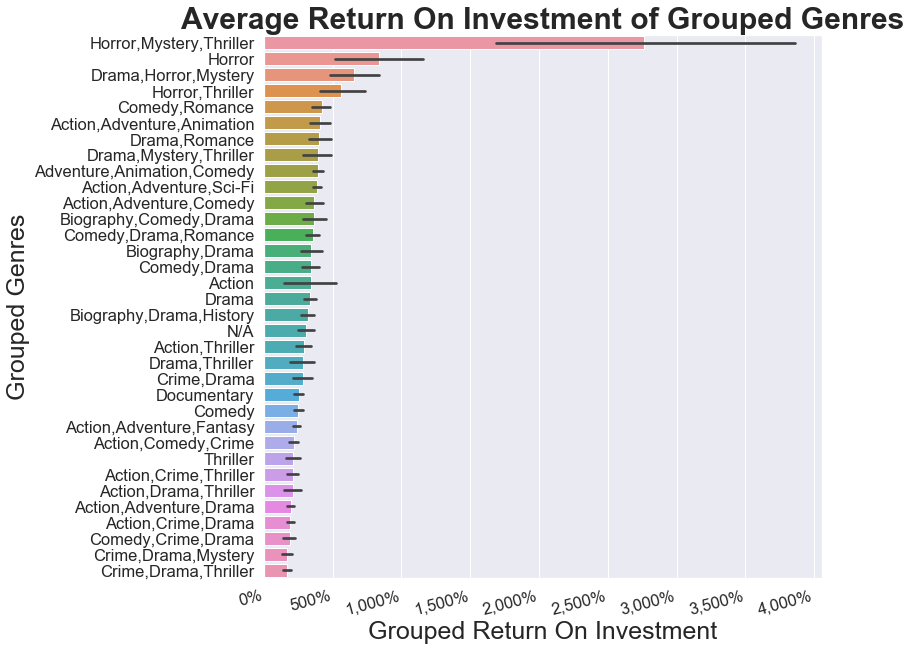

In [201]:
plt.figure(figsize=(10,10))
sns.set(style='darkgrid', font_scale=1.5)
ax = sns.barplot(data=perc_group_prof_df, orient='h', ci=68)
ax.set_xlabel('Grouped Return On Investment', fontsize=25)
ax.set_ylabel('Grouped Genres', fontsize=25)
ax.set_title('Average Return On Investment of Grouped Genres', fontsize=30, weight='bold')

ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
ax.set_yticklabels(ax.get_yticklabels())
#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '{x:,.0f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);
# ax.set(xlim=(0, 600000000))
# ax.set_xticks(range(0, 600000000, 50000000));

# Question 3: Which 25 U.S. directors have the highest average net profit within the past 20 years?

## Our files of interest for this question would be: imdb_title_df, imdb_name_df, tn_movie_budget_df, imdb_title_crew, and imdb_title_basics_df

In [202]:
imdb_title_rating_df.head(3)

tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20

In [203]:
imdb_title_crew_df.head(3)

tconst  directors              writers
0  tt0285252  nm0899854            nm0899854
1  tt0438973        NaN  nm0175726,nm1802864
2  tt0462036  nm1940585            nm1940585

In [204]:
imdb_title_basics_clean.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              0.0          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [205]:
tn_movie_budget_df.head()

id  release_date                                primary_title  \
0   1          2009                                       Avatar   
1   2          2011  Pirates of the Caribbean: On Stranger Tides   
2   3          2019                                 Dark Phoenix   
3   4          2015                      Avengers: Age of Ultron   
4   5          2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0        425000000.0     760507625.0     2.776345e+09  
1        410600000.0     241063875.0     1.045664e+09  
2        350000000.0      42762350.0     1.497624e+08  
3        330600000.0     459005868.0     1.403014e+09  
4        317000000.0     620181382.0     1.316722e+09

In [206]:
imdb_name_df.head()

nconst       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   

                                 primary_profession  \
0         miscellaneous,production_manager,producer   
1        composer,music_department,sound_department   
2                        miscellaneous,actor,writer   
3  camera_department,cinematographer,art_department   
4  production_designer,art_department,set_decorator   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553  
1  tt0896534,tt6791238,tt0287072,tt1682940  
2  tt1470654,tt0363631,tt0104030,tt0102898  
3  tt0114371,tt2004304,tt1618448,tt1224387  
4  tt0452644,tt0452692,tt3458030,tt2178256

In [207]:
imdb_name_df['death_year'].fillna(0, inplace=True)

In [208]:
imdb_title_df.head()

tconst  ordering                                    title region  \
0  tt0369610        10                            Джурасик свят     BG   
1  tt0369610        11                        Jurashikku warudo     JP   
2  tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3  tt0369610        13                  O Mundo dos Dinossauros     BR   
4  tt0369610        14                           Jurassic World     FR   

  language        types   attributes  is_original_title  
0       bg          NaN          NaN                0.0  
1      NaN  imdbDisplay          NaN                0.0  
2      NaN  imdbDisplay          NaN                0.0  
3      NaN          NaN  short title                0.0  
4      NaN  imdbDisplay          NaN                0.0

#### Going to make a new dataframe by joining imdb_title_basics, imdb_title_crew_df, tn_movie_budget_df, imdb_title_df, imdb_name_df where we target only US movies, removing null valued rows where worldwide gross <= 0, making sure the director isn't already dead, and setting the release date between 2000 and 2020. Then we group it all by primary title.

In [209]:
best_dir_df = pysqldf("""SELECT b.primary_title, b.tconst, b.genres,
                         m.production_budget, m.worldwide_gross, n.primary_name
                         FROM imdb_title_basics_clean b
                         JOIN imdb_title_crew_df c
                         USING (tconst)
                         JOIN tn_movie_budget_df m
                         USING (primary_title)
                         JOIN imdb_title_df t
                         USING(tconst)
                         JOIN imdb_name_df n
                         ON (c.directors = n.nconst)
                         WHERE(t.region = 'US')
                               AND (m.worldwide_gross > 0)
                               AND (n.death_year < 1)
                               AND (m.release_date > 1999 AND m.release_date <= 2020)
                         GROUP BY (b.primary_title);""")

In [210]:
best_dir_df.head()

primary_title     tconst                     genres  \
0    10 Cloverfield Lane  tt1179933       Drama,Horror,Mystery   
1  10 Days in a Madhouse  tt3453052                      Drama   
2              12 Strong  tt1413492       Action,Drama,History   
3       12 Years a Slave  tt2024544    Biography,Drama,History   
4              127 Hours  tt1542344  Adventure,Biography,Drama   

   production_budget  worldwide_gross      primary_name  
0          5000000.0      108286422.0  Dan Trachtenberg  
1         12000000.0          14616.0     Timothy Hines  
2         35000000.0       71118378.0   Nicolai Fuglsig  
3         20000000.0      181025343.0     Steve McQueen  
4         18000000.0       60217171.0       Danny Boyle

In [211]:
len(best_dir_df)

1386

In [212]:
perc_null(best_dir_df)

primary_title        0.0
tconst               0.0
genres               0.0
production_budget    0.0
worldwide_gross      0.0
primary_name         0.0
dtype: float64

In [213]:
best_dir_df['tot_profit'] = best_dir_df['worldwide_gross'] - best_dir_df['production_budget']

In [214]:
unique_dirs = [name for name in best_dir_df['primary_name'].unique()]

In [215]:
dir_dict = {}
gb = best_dir_df.groupby('primary_name')
# gb.get_group('Action,Animation,Comedy')['tot_profit']
for name in unique_dirs:
    dir_dict[name] = gb.get_group(name).reset_index()['tot_profit']

In [216]:
dir_revenue_df = pd.DataFrame(dir_dict)

In [217]:
dir_revenue_df.head()

Dan Trachtenberg  Timothy Hines  Nicolai Fuglsig  Steve McQueen  \
0       103286422.0    -11985384.0       36118378.0    161025343.0   
1               NaN            NaN              NaN     13912841.0   
2               NaN            NaN              NaN     33866088.0   
3               NaN            NaN              NaN            NaN   
4               NaN            NaN              NaN            NaN   

   Danny Boyle  Daniel Stamm  Baltasar Kormákur  Dylan Baker  Tom Tykwer  \
0   42217171.0    -3952448.0         71493015.0    -450815.0  -6904508.0   
1          NaN    68365900.0         73406855.0          NaN         NaN   
2          NaN           NaN        156297061.0          NaN         NaN   
3          NaN           NaN                NaN          NaN         NaN   
4          NaN           NaN                NaN          NaN         NaN   

   Eric Mendelsohn  ...  Debra Granik  Bart Freundlich  Dylan Brown  \
0        -260525.0  ...    14131551.0      -17905047.0   15149422.0   
1              NaN  ...           NaN              NaN          NaN   
2              NaN  ...           NaN              NaN          NaN   
3              NaN  ...           NaN              NaN          NaN   
4              NaN  ...           NaN              NaN          NaN   

   Patty Jenkins  Brandon Slagle   Rich Moore  Jehan Semper  Eric Brevig  \
0    671133378.0      -4439488.0  331511521.0    -1038779.0  124774690.0   
1            NaN             NaN          NaN           NaN          NaN   
2            NaN             NaN          NaN           NaN          NaN   
3            NaN             NaN          NaN           NaN          NaN   
4            NaN             NaN          NaN           NaN          NaN   

   Lynn Shelton  Kathryn Bigelow  
0     2970593.0       82112435.0  
1           NaN              NaN  
2           NaN              NaN  
3           NaN              NaN  
4           NaN              NaN  

[5 rows x 977 columns]

In [218]:
dir_revenue_df.mean().sort_values(ascending=False)

Joss Whedon             1.182675e+09
Adam Green              1.122470e+09
Lee Unkrich             8.688795e+08
Sam Mendes              7.450740e+08
Tim Miller              7.430256e+08
                            ...     
Xiao Feng              -6.448372e+07
Andrey Konchalovskiy   -6.953398e+07
Terry George           -7.944858e+07
Simon Wells            -1.104502e+08
Simon Kinberg          -2.002376e+08
Length: 977, dtype: float64

In [219]:
dir_revenue_df = dir_revenue_df.reindex(dir_revenue_df.mean().sort_values(ascending=False).index, axis=1)

In [220]:
dir_revenue_df.head()

Joss Whedon    Adam Green  Lee Unkrich   Sam Mendes   Tim Miller  \
0  1.072414e+09  1.122470e+09  868879522.0  910526981.0  743025593.0   
1  1.292936e+09           NaN          NaN  579620923.0          NaN   
2           NaN           NaN          NaN          NaN          NaN   
3           NaN           NaN          NaN          NaN          NaN   
4           NaN           NaN          NaN          NaN          NaN   

   Peter Jackson  Colin Trevorrow  Artie Mandelberg     James Wan  \
0    767003568.0     1.433855e+09       679235992.0  9.868946e+08   
1    695577621.0     3.672318e+06               NaN  1.328723e+09   
2    710366855.0              NaN               NaN  9.837089e+07   
3            NaN              NaN               NaN  2.980001e+08   
4            NaN              NaN               NaN           NaN   

   Patty Jenkins  ...  Emilio Rodriguez  Alex Alessi  Lawrence Kasanoff  \
0    671133378.0  ...       -39536270.0  -39920877.0        -44926294.0   
1            NaN  ...               NaN          NaN                NaN   
2            NaN  ...               NaN          NaN                NaN   
3            NaN  ...               NaN          NaN                NaN   
4            NaN  ...               NaN          NaN                NaN   

   Michael Mann  Robert Schwentke   Xiao Feng  Andrey Konchalovskiy  \
0   -50334996.0       -50923322.0 -64483721.0           -69533984.0   
1           NaN               NaN         NaN                   NaN   
2           NaN               NaN         NaN                   NaN   
3           NaN               NaN         NaN                   NaN   
4           NaN               NaN         NaN                   NaN   

   Terry George  Simon Wells  Simon Kinberg  
0   -79448583.0 -110450242.0   -200237650.0  
1           NaN          NaN            NaN  
2           NaN          NaN            NaN  
3           NaN          NaN            NaN  
4           NaN          NaN            NaN  

[5 rows x 977 columns]

In [221]:
top_25 = dir_revenue_df.iloc[:,0:24]
top_25

Joss Whedon    Adam Green  Lee Unkrich   Sam Mendes   Tim Miller  \
0  1.072414e+09  1.122470e+09  868879522.0  910526981.0  743025593.0   
1  1.292936e+09           NaN          NaN  579620923.0          NaN   
2           NaN           NaN          NaN          NaN          NaN   
3           NaN           NaN          NaN          NaN          NaN   
4           NaN           NaN          NaN          NaN          NaN   
5           NaN           NaN          NaN          NaN          NaN   
6           NaN           NaN          NaN          NaN          NaN   

   Peter Jackson  Colin Trevorrow  Artie Mandelberg     James Wan  \
0    767003568.0     1.433855e+09       679235992.0  9.868946e+08   
1    695577621.0     3.672318e+06               NaN  1.328723e+09   
2    710366855.0              NaN               NaN  9.837089e+07   
3            NaN              NaN               NaN  2.980001e+08   
4            NaN              NaN               NaN           NaN   
5            NaN              NaN               NaN           NaN   
6            NaN              NaN               NaN           NaN   

   Patty Jenkins  ...  Gareth Edwards  Christopher Nolan  Alfonso Cuarón  \
0    671133378.0  ...     369076069.0        349837368.0     583698673.0   
1            NaN  ...     849102856.0        675524642.0             NaN   
2            NaN  ...             NaN        501379375.0             NaN   
3            NaN  ...             NaN        809439099.0             NaN   
4            NaN  ...             NaN                NaN             NaN   
5            NaN  ...             NaN                NaN             NaN   
6            NaN  ...             NaN                NaN             NaN   

   Robert Stromberg  Michael Bay  Dan Scanlon   Bill Condon     Brad Bird  \
0       578536735.0   55275291.0  543588329.0  1.099200e+09  1.042521e+09   
1               NaN  894039076.0          NaN -1.984583e+07  3.662752e+07   
2               NaN  928790543.0          NaN           NaN           NaN   
3               NaN  385893340.0          NaN           NaN           NaN   
4               NaN          NaN          NaN           NaN           NaN   
5               NaN          NaN          NaN           NaN           NaN   
6               NaN          NaN          NaN           NaN           NaN   

   Sam Taylor-Johnson      Ang Lee  
0         530998101.0  500912003.0  
1                 NaN          NaN  
2                 NaN          NaN  
3                 NaN          NaN  
4                 NaN          NaN  
5                 NaN          NaN  
6                 NaN          NaN  

[7 rows x 24 columns]

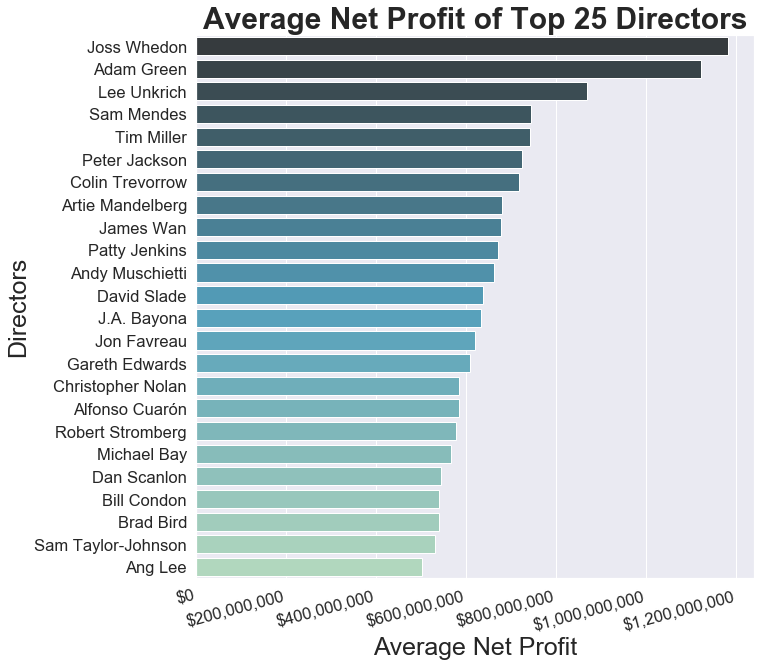

In [222]:
plt.figure(figsize=(10,10))
sns.set(style='darkgrid', font_scale=1.5)
ax = sns.barplot(data=top_25, orient='h', ci=None, palette="GnBu_d")
ax.set_xlabel('Average Net Profit', fontsize=25)
ax.set_ylabel('Directors', fontsize=25)
ax.set_title('Average Net Profit of Top 25 Directors', fontsize=30, weight='bold')

ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
ax.set_yticklabels(ax.get_yticklabels())
#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);

#### These are the top 25 directors who, on average, have the accrued the highest net profit from directing U.S.  movies within the past 20 years.

### Test Area

In [223]:
crew_rating = pysqldf("""SELECT *
                         FROM imdb_title_rating_df 
                         JOIN imdb_title_crew_df c
                         USING(tconst)
                         JOIN imdb_name_df i
                         ON(c.directors = i.nconst);""")

In [224]:
crew_rating.head()

tconst  averagerating  numvotes  directors  \
0  tt10356526            8.3        31  nm8353804   
1   tt1042974            6.4        20  nm1915232   
2   tt1043726            4.2     50352  nm0001317   
3   tt1060240            6.5        21  nm1926349   
4   tt1069246            6.2       326  nm0868643   

                                   writers     nconst      primary_name  \
0                      nm3057599,nm4179342  nm8353804     Sukh Sanghera   
1                                nm1915232  nm1915232      Marcel Grant   
2  nm0393517,nm0316417,nm0001317,nm1048866  nm0001317      Renny Harlin   
3                                nm1926349  nm1926349  Carlos M. Barros   
4  nm2726004,nm0140502,nm1523568,nm0868643  nm0868643       Fina Torres   

   birth_year  death_year                            primary_profession  \
0         NaN         0.0  director,cinematographer,location_management   
1         NaN         0.0                      director,writer,producer   
2      1959.0         0.0                      producer,director,writer   
3         NaN         0.0              director,writer,casting_director   
4      1951.0         0.0                      writer,director,producer   

                           known_for_titles  
0  tt10356526,tt8749962,tt9579874,tt5231224  
1   tt1042974,tt1538868,tt0949872,tt0458519  
2   tt2238032,tt0149261,tt0099423,tt0106582  
3   tt1612376,tt1823187,tt0460544,tt1060240  
4   tt0089739,tt0107537,tt2325833,tt1069246

In [225]:
crew_rating['death_year'].isna().value_counts()

False    64996
Name: death_year, dtype: int64

In [226]:
crew_rating['death_year'].fillna(0, inplace=True)

In [227]:
# x=0
# for i, row in crew_rating.iterrows():
#     if row['death_year'] > 1:
#         x+=1
#         print(i, row['primary_name'], row['death_year'])
#     else:
#         continue
# print(x)

In [228]:
crew_rating['death_year'].isna().value_counts()

False    64996
Name: death_year, dtype: int64

In [229]:
crew_rating = crew_rating[crew_rating['death_year'] < 1]

In [230]:
crew_rating.head()

tconst  averagerating  numvotes  directors  \
0  tt10356526            8.3        31  nm8353804   
1   tt1042974            6.4        20  nm1915232   
2   tt1043726            4.2     50352  nm0001317   
3   tt1060240            6.5        21  nm1926349   
4   tt1069246            6.2       326  nm0868643   

                                   writers     nconst      primary_name  \
0                      nm3057599,nm4179342  nm8353804     Sukh Sanghera   
1                                nm1915232  nm1915232      Marcel Grant   
2  nm0393517,nm0316417,nm0001317,nm1048866  nm0001317      Renny Harlin   
3                                nm1926349  nm1926349  Carlos M. Barros   
4  nm2726004,nm0140502,nm1523568,nm0868643  nm0868643       Fina Torres   

   birth_year  death_year                            primary_profession  \
0         NaN         0.0  director,cinematographer,location_management   
1         NaN         0.0                      director,writer,producer   
2      1959.0         0.0                      producer,director,writer   
3         NaN         0.0              director,writer,casting_director   
4      1951.0         0.0                      writer,director,producer   

                           known_for_titles  
0  tt10356526,tt8749962,tt9579874,tt5231224  
1   tt1042974,tt1538868,tt0949872,tt0458519  
2   tt2238032,tt0149261,tt0099423,tt0106582  
3   tt1612376,tt1823187,tt0460544,tt1060240  
4   tt0089739,tt0107537,tt2325833,tt1069246

In [231]:
crew_rating['death_year'].value_counts()

0.0    64439
Name: death_year, dtype: int64

In [232]:
dir_rating_df = pysqldf("""SELECT tconst, averagerating, numvotes, primary_name as 'director'
                           FROM crew_rating;""")

# Test Area

In [233]:
len(imdb_title_basics_df)

45218

In [234]:
imdb_title_basics_df.head(3)

tconst          primary_title        original_title  start_year  \
0  tt1699720  !Women Art Revolution  Women Art Revolution        2010   
1  tt2346170       #1 Serial Killer      #1 Serial Killer        2013   
2  tt3120962                     #5                    #5        2013   

   runtime_minutes                    genres  
0             83.0               Documentary  
1             87.0                    Horror  
2             68.0  Biography,Comedy,Fantasy

In [235]:
len(dir_rating_df)

64439

In [236]:
gen_dir_rating_df = pysqldf('''SELECT genres, d.*
                               FROM imdb_title_basics_df 
                               JOIN dir_rating_df d
                               USING(tconst);''')

In [237]:
len(gen_dir_rating_df)

22126

In [238]:
test_rating_df = pysqldf('''SELECT tconst, averagerating, numvotes, director, genres
                            FROM gen_dir_rating_df
                            WHERE genres = 'Action,Adventure,Comedy' 
                            OR genres = 'Action,Adventure,Sci-Fi' 
                            OR genres = 'Action,Adventure,Fantasy' 
                            OR genres = 'Adventure,Animation,Comedy'
                            OR genres = 'Action,Adventure,Animation';''')

In [239]:
for col in test_rating_df:
    print(f'{col}: {test_rating_df[col].duplicated().sum()}')

tconst: 0
averagerating: 348
numvotes: 30
director: 65
genres: 411


In [240]:
new_test_rating = pysqldf("""SELECT *
                             FROM test_rating_df
                             WHERE numvotes > 20000
                             GROUP BY (director);""")

In [241]:
new_test_rating = new_test_rating.sort_values('averagerating',ascending=False).reset_index(drop=True)

In [242]:
new_test_rating['genres'].unique()

array(['Action,Adventure,Sci-Fi', 'Adventure,Animation,Comedy',
       'Action,Adventure,Comedy', 'Action,Adventure,Animation',
       'Action,Adventure,Fantasy'], dtype=object)

In [243]:
new_test_rating.loc[new_test_rating['genres'] == 'Action,Adventure,Sci-Fi']

tconst  averagerating  numvotes            director  \
0    tt1375666            8.8   1841066   Christopher Nolan   
3    tt1392190            8.1    780910       George Miller   
9    tt1408101            7.7    445535         J.J. Abrams   
12   tt1677720            7.5    301660    Steven Spielberg   
14   tt0437086            7.5     88207    Robert Rodriguez   
15   tt1951264            7.5    575455    Francis Lawrence   
16   tt2250912            7.5    426302           Jon Watts   
19   tt1825683            7.3    516148        Ryan Coogler   
24   tt2395427            7.3    665594         Joss Whedon   
27   tt1300854            7.2    692794         Shane Black   
30   tt1392170            7.2    795227           Gary Ross   
33   tt2660888            7.1    209844          Justin Lin   
35   tt3385516            7.0    356556        Bryan Singer   
36   tt0948470            7.0    525632           Marc Webb   
37   tt1228705            7.0    657690         Jon Favreau   
38   tt0369610            7.0    539338     Colin Trevorrow   
39   tt1483013            7.0    453966     Joseph Kosinski   
43   tt0458339            6.9    668137        Joe Johnston   
45   tt1663662            6.9    443667  Guillermo del Toro   
47   tt4701182            6.9     94155       Travis Knight   
57   tt0401729            6.6    241792      Andrew Stanton   
66   tt1424381            6.4    199764        Nimród Antal   
67   tt1340138            6.4    234615         Alan Taylor   
69   tt1411250            6.4    144821         David Twohy   
70   tt0831387            6.4    350687      Gareth Edwards   
76   tt2908446            6.2    199710    Robert Schwentke   
77   tt4881806            6.2    219125         J.A. Bayona   
80   tt1464540            6.1    217762         D.J. Caruso   
83   tt6565702            6.0     24451       Simon Kinberg   
87   tt3717490            6.0     92013      Dean Israelite   
94   tt2094766            5.8    167110       Justin Kurzel   
96   tt1440129            5.8    225342          Peter Berg   
97   tt1583421            5.8    165536          Jon M. Chu   
102  tt2109248            5.7    283486         Michael Bay   
104  tt2557478            5.6     89462  Steven S. DeKnight   
107  tt1133985            5.5    252281     Martin Campbell   
112  tt1628841            5.2    155344     Roland Emmerich   

                      genres  
0    Action,Adventure,Sci-Fi  
3    Action,Adventure,Sci-Fi  
9    Action,Adventure,Sci-Fi  
12   Action,Adventure,Sci-Fi  
14   Action,Adventure,Sci-Fi  
15   Action,Adventure,Sci-Fi  
16   Action,Adventure,Sci-Fi  
19   Action,Adventure,Sci-Fi  
24   Action,Adventure,Sci-Fi  
27   Action,Adventure,Sci-Fi  
30   Action,Adventure,Sci-Fi  
33   Action,Adventure,Sci-Fi  
35   Action,Adventure,Sci-Fi  
36   Action,Adventure,Sci-Fi  
37   Action,Adventure,Sci-Fi  
38   Action,Adventure,Sci-Fi  
39   Action,Adventure,Sci-Fi  
43   Action,Adventure,Sci-Fi  
45   Action,Adventure,Sci-Fi  
47   Action,Adventure,Sci-Fi  
57   Action,Adventure,Sci-Fi  
66   Action,Adventure,Sci-Fi  
67   Action,Adventure,Sci-Fi  
69   Action,Adventure,Sci-Fi  
70   Action,Adventure,Sci-Fi  
76   Action,Adventure,Sci-Fi  
77   Action,Adventure,Sci-Fi  
80   Action,Adventure,Sci-Fi  
83   Action,Adventure,Sci-Fi  
87   Action,Adventure,Sci-Fi  
94   Action,Adventure,Sci-Fi  
96   Action,Adventure,Sci-Fi  
97   Action,Adventure,Sci-Fi  
102  Action,Adventure,Sci-Fi  
104  Action,Adventure,Sci-Fi  
107  Action,Adventure,Sci-Fi  
112  Action,Adventure,Sci-Fi

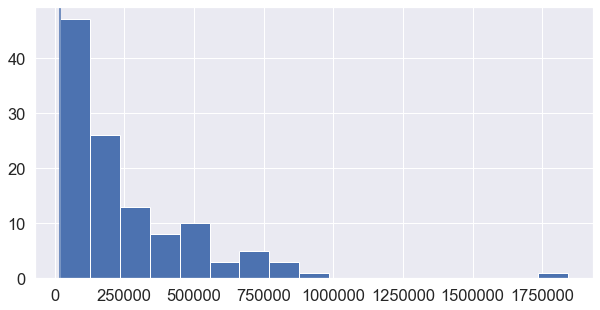

In [244]:
plt.figure(figsize=(10,5))
ax = new_test_rating['numvotes'].hist(bins='auto')
ax.axvline(20000);

In [245]:
new_test_rating['genres'].value_counts()

Action,Adventure,Sci-Fi       37
Action,Adventure,Fantasy      30
Adventure,Animation,Comedy    25
Action,Adventure,Comedy       20
Action,Adventure,Animation     5
Name: genres, dtype: int64

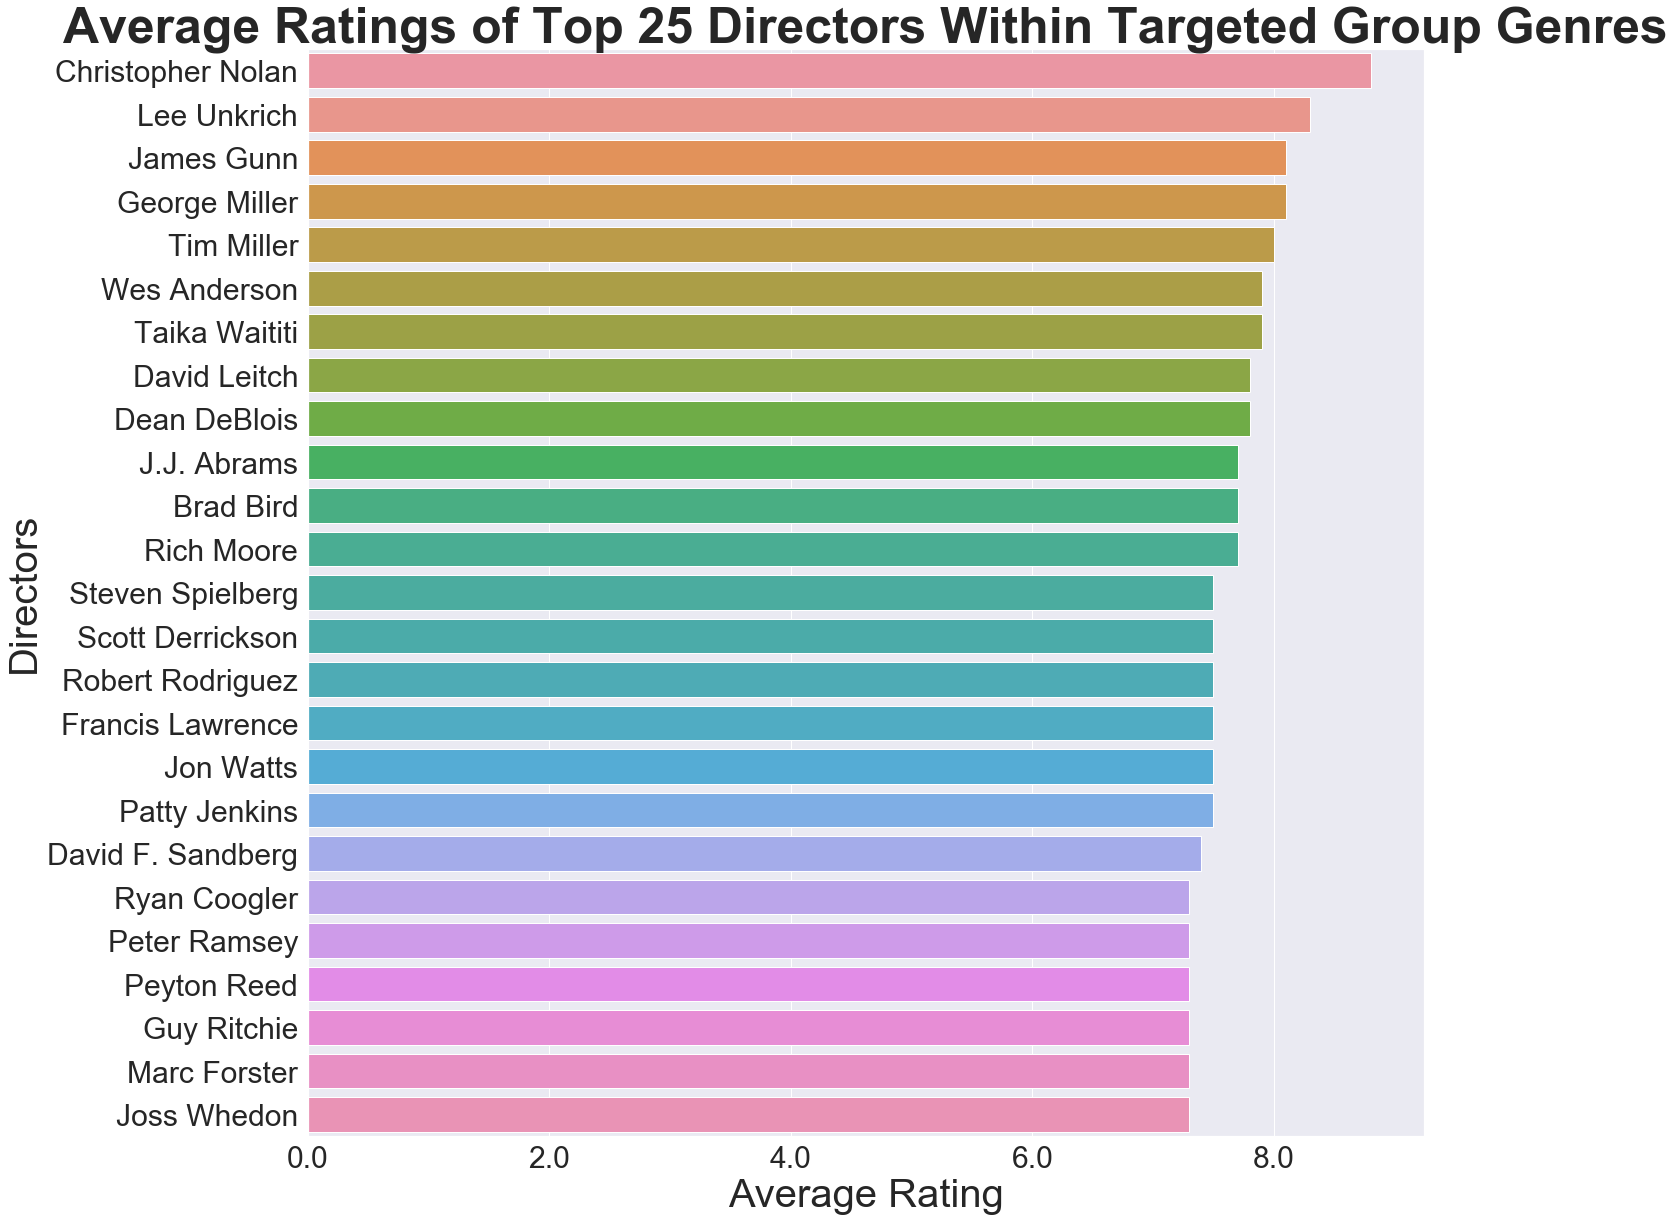

In [246]:
plt.figure(figsize=(20, 20))
sns.set(style='darkgrid')
ax = sns.barplot(x='averagerating', y='director',data=new_test_rating.head(25), orient='h', ci=None)
ax.set_xlabel('Average Rating', fontsize=40)
ax.set_ylabel('Directors', fontsize=40)
ax.set_title('Average Ratings of Top 25 Directors Within Targeted Group Genres', fontsize=50, weight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=30)
# ax.set(xlim=(5.0, 9.0))
# ax.set_xticks(range(5, 9, 1));
fmt = '{x:,.0f}.0'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);

In [247]:
len(new_df)

2126

In [248]:
new_df.head(1)

tconst                    genres  runtime_minutes  release_date  \
0  tt1298650  Action,Adventure,Fantasy            136.0          2011   

                                 primary_title  production_budget  \
0  Pirates of the Caribbean: On Stranger Tides        410600000.0   

   domestic_gross  worldwide_gross   tot_profit         ROI  
0     241063875.0     1.045664e+09  635063875.0  254.667286

In [249]:
date_df = new_df[(new_df['release_date'] >= 2010) & (new_df['release_date'] < 2020)]

In [250]:
date_cols = [col for col in date_df['genres'].unique()]

In [251]:
date_dict = {}
gbdate = date_df.groupby('genres')
for genre in date_cols:
    date_dict[genre] = gbdate.get_group(genre)['tot_profit']


In [252]:
group_date_df = pd.DataFrame(date_dict)

In [253]:
for col in group_date_df:
    if group_date_df[col].describe()['count'] < 25:
        group_date_df = group_date_df.drop(columns=col)
    else:
        continue


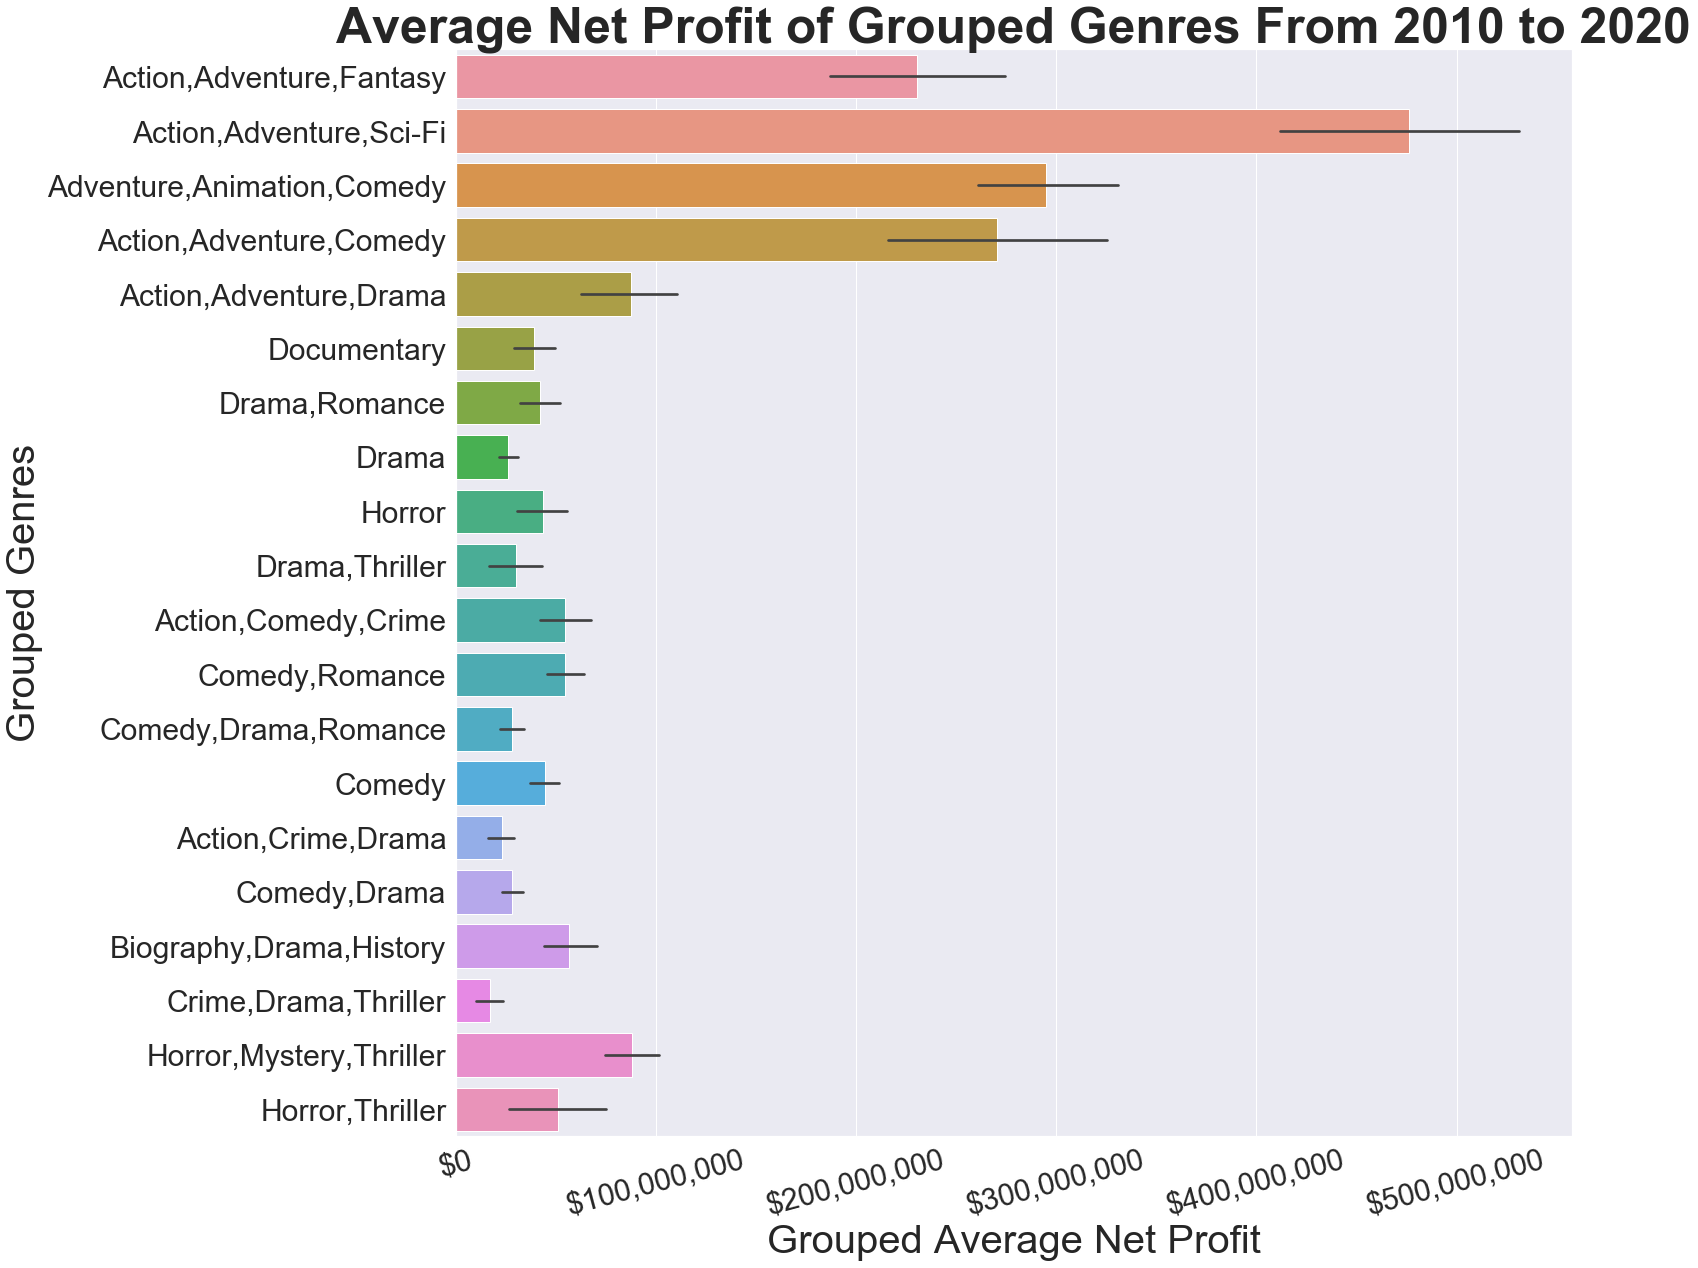

In [254]:
plt.figure(figsize=(20,20))
sns.set(style='darkgrid')
ax = sns.barplot(data=group_date_df, orient='h', ci=68)
ax.set_xlabel('Grouped Average Net Profit', fontsize=40)
ax.set_ylabel('Grouped Genres', fontsize=40)
ax.set_title('Average Net Profit of Grouped Genres From 2010 to 2020',fontsize=50, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, fontsize=30)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=30)
#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick);

In [255]:
date_df.head()

tconst                    genres  runtime_minutes  release_date  \
0  tt1298650  Action,Adventure,Fantasy            136.0          2011   
1  tt6565702   Action,Adventure,Sci-Fi            113.0          2019   
2  tt2395427   Action,Adventure,Sci-Fi            141.0          2015   
3  tt4154756   Action,Adventure,Sci-Fi            149.0          2018   
4  tt0974015  Action,Adventure,Fantasy            120.0          2017   

                                 primary_title  production_budget  \
0  Pirates of the Caribbean: On Stranger Tides        410600000.0   
1                                 Dark Phoenix        350000000.0   
2                      Avengers: Age of Ultron        330600000.0   
3                       Avengers: Infinity War        300000000.0   
4                               Justice League        300000000.0   

   domestic_gross  worldwide_gross    tot_profit         ROI  
0     241063875.0     1.045664e+09  6.350639e+08  254.667286  
1      42762350.0     1.497624e+08 -2.002376e+08   42.789243  
2     459005868.0     1.403014e+09  1.072414e+09  424.384139  
3     678815482.0     2.048134e+09  1.748134e+09  682.711400  
4     229024295.0     6.559452e+08  3.559452e+08  218.648403

# Test Area

In [256]:
next_gen_df = pysqldf("""SELECT *
                         FROM date_df
                         WHERE genres = 'Action,Adventure,Comedy' 
                            OR genres = 'Action,Adventure,Sci-Fi' 
                            OR genres = 'Action,Adventure,Fantasy' 
                            OR genres = 'Adventure,Animation,Comedy'
                            AND (domestic_gross + worldwide_gross) != 0;""")

In [257]:
next_gen_df.head()

tconst                    genres  runtime_minutes  release_date  \
0  tt1298650  Action,Adventure,Fantasy            136.0          2011   
1  tt6565702   Action,Adventure,Sci-Fi            113.0          2019   
2  tt2395427   Action,Adventure,Sci-Fi            141.0          2015   
3  tt4154756   Action,Adventure,Sci-Fi            149.0          2018   
4  tt0974015  Action,Adventure,Fantasy            120.0          2017   

                                 primary_title  production_budget  \
0  Pirates of the Caribbean: On Stranger Tides        410600000.0   
1                                 Dark Phoenix        350000000.0   
2                      Avengers: Age of Ultron        330600000.0   
3                       Avengers: Infinity War        300000000.0   
4                               Justice League        300000000.0   

   domestic_gross  worldwide_gross    tot_profit         ROI  
0     241063875.0     1.045664e+09  6.350639e+08  254.667286  
1      42762350.0     1.497624e+08 -2.002376e+08   42.789243  
2     459005868.0     1.403014e+09  1.072414e+09  424.384139  
3     678815482.0     2.048134e+09  1.748134e+09  682.711400  
4     229024295.0     6.559452e+08  3.559452e+08  218.648403

<Figure size 1440x1440 with 0 Axes>

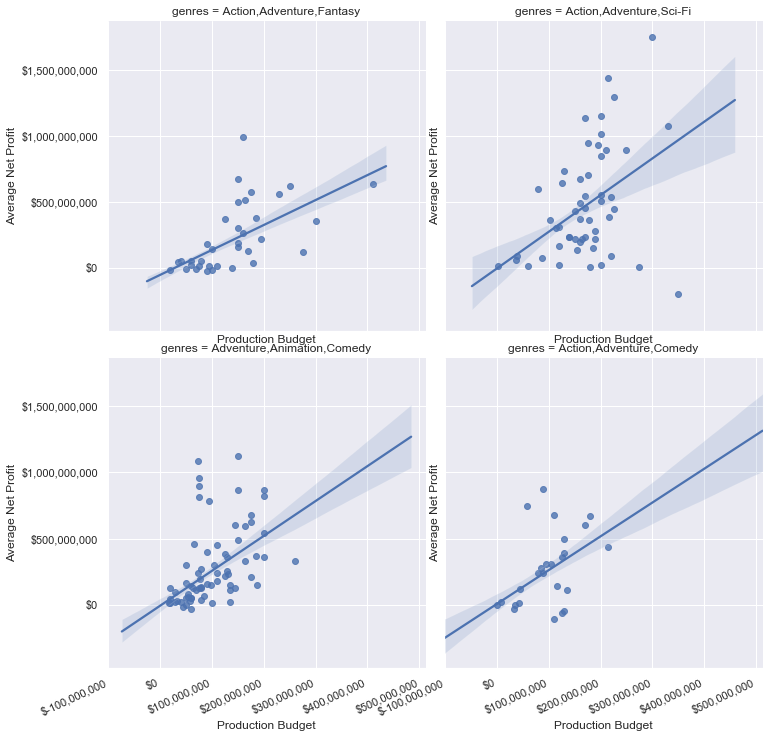

In [258]:
plt.figure(figsize=(20, 20))
sns.set(style='darkgrid', font_scale=1)
ax = sns.lmplot(x='production_budget', y='tot_profit', col_wrap=2,col='genres',data=next_gen_df, ci=68, robust=True)
#ax.set_title('Average Net Profit of Grouped Genres From 2000 to 2019')
fig = plt.gcf()
for ax in fig.get_axes():
    ax.set_xlabel('Production Budget')
    ax.set_ylabel('Average Net Profit')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')
    #ax.set_title('Average Net Profit of Grouped Genres From 2000 to 2019')
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    ax.xaxis.set_major_formatter(tick);
# ax.set_xlabel('Year', fontsize=40)
# ax.set_ylabel('Average Net Profit', fontsize=40)
# ax.set_title('Average Net Profit of Grouped Genres From 2000 to 2019',fontsize=50, weight='bold')
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=30)

#Retrieved from https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
# fmt = '${x:,.0f}'
# tick = mtick.StrMethodFormatter(fmt)
# ax.yaxis.set_major_formatter(tick);

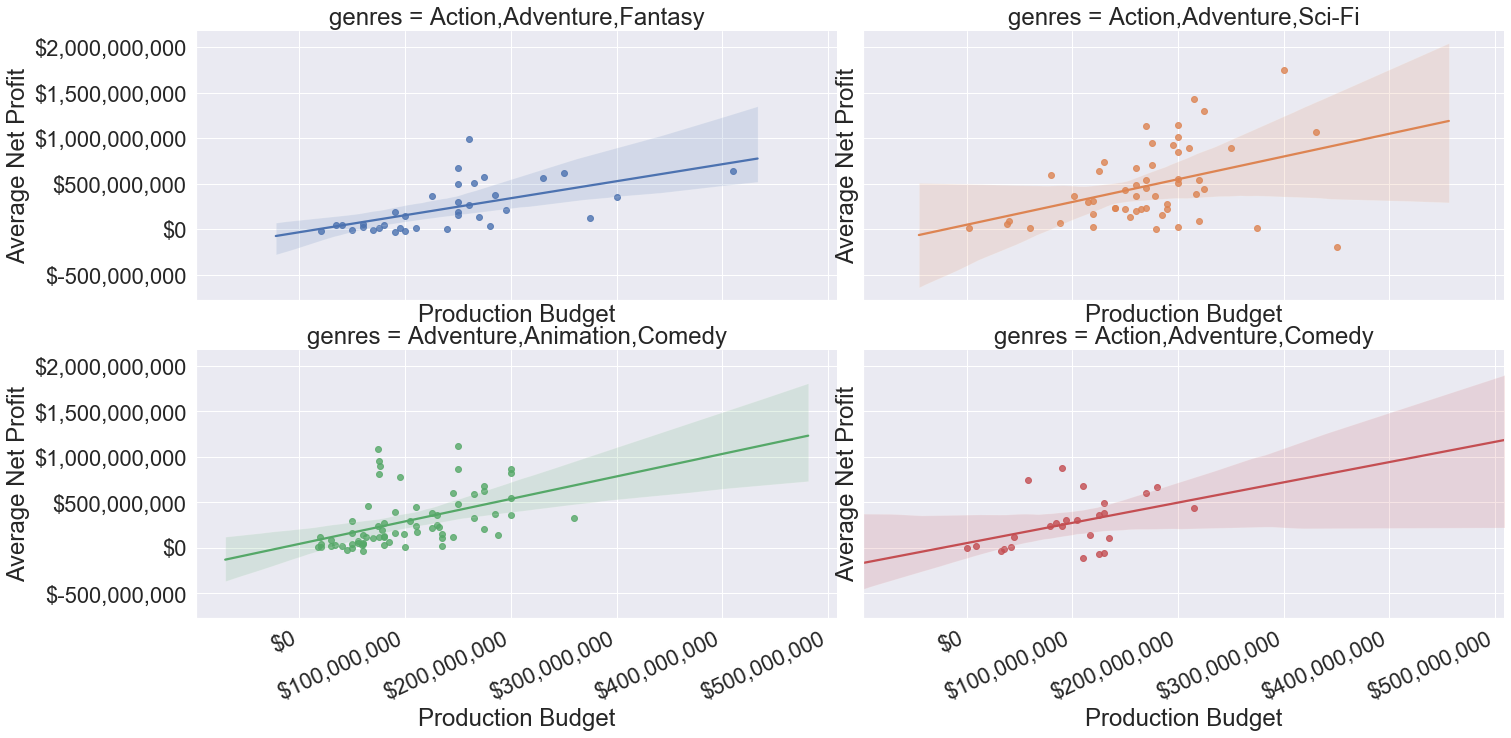

In [259]:
sns.set(font_scale=2)
g = sns.lmplot('production_budget','tot_profit',next_gen_df,hue='genres',aspect=2,col='genres',col_wrap=2, ci=99)
fig = g.fig
axes = fig.get_axes()
for ax in axes:
    ax.set_xlabel('Production Budget')
    ax.set_ylabel('Average Net Profit')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')
    #ax.set_title('Average Net Profit of Grouped Genres From 2000 to 2019')
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    ax.xaxis.set_major_formatter(tick);

In [260]:
next_gen_df.corr()

runtime_minutes  release_date  production_budget  \
runtime_minutes           1.000000      0.086043           0.628423   
release_date              0.086043      1.000000          -0.046861   
production_budget         0.628423     -0.046861           1.000000   
domestic_gross            0.478251     -0.014802           0.533766   
worldwide_gross           0.516214     -0.009782           0.608343   
tot_profit                0.443951     -0.001162           0.469368   
ROI                       0.114609      0.031703           0.013333   

                   domestic_gross  worldwide_gross  tot_profit       ROI  
runtime_minutes          0.478251         0.516214    0.443951  0.114609  
release_date            -0.014802        -0.009782   -0.001162  0.031703  
production_budget        0.533766         0.608343    0.469368  0.013333  
domestic_gross           1.000000         0.938902    0.933849  0.657150  
worldwide_gross          0.938902         1.000000    0.986353  0.684802  
tot_profit               0.933849         0.986353    1.000000  0.759111  
ROI                      0.657150         0.684802    0.759111  1.000000

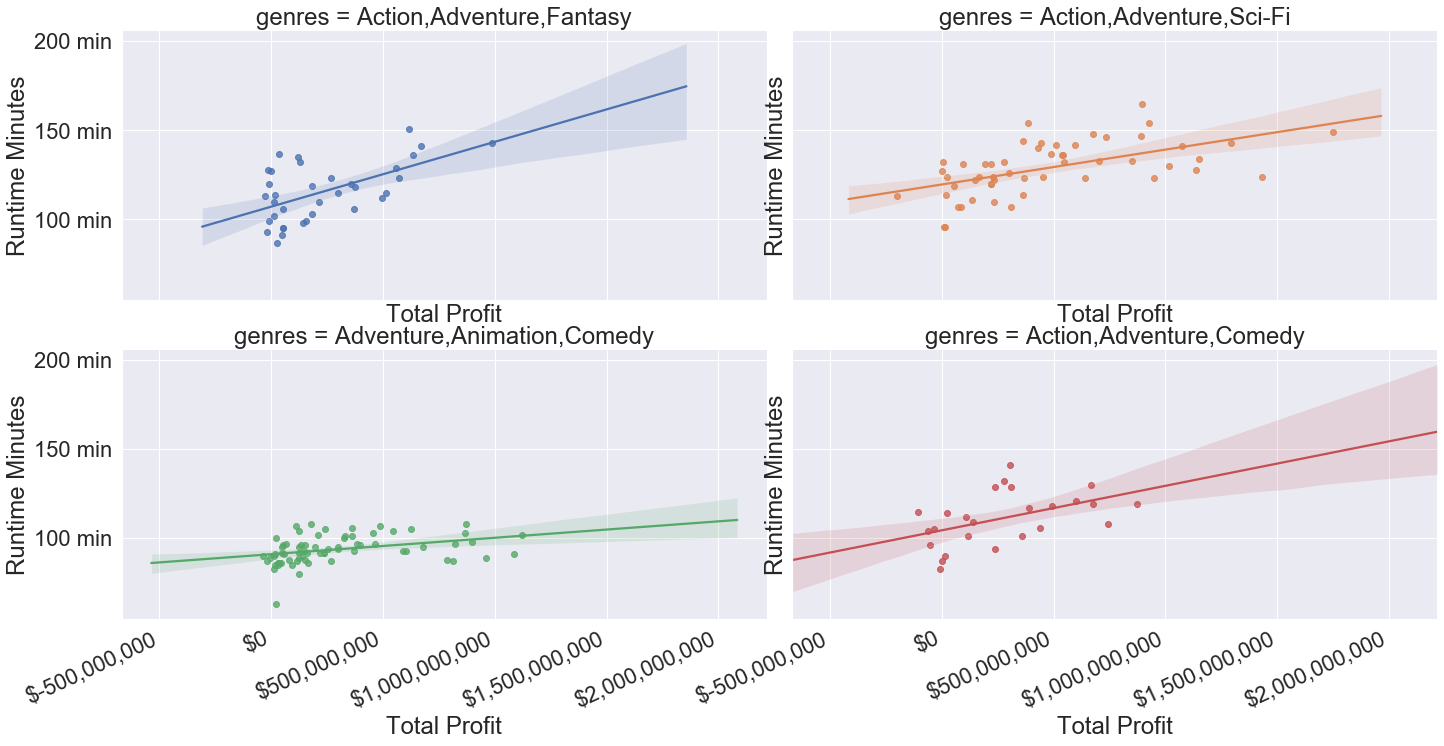

In [261]:
sns.set(font_scale=2)
h = sns.lmplot('tot_profit', 'runtime_minutes',next_gen_df,hue='genres',aspect=2,col='genres',col_wrap=2)
fig = h.fig
axes = fig.get_axes()
for ax in axes:
    ax.set_xlabel('Total Profit')
    ax.set_ylabel('Runtime Minutes')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')
    #ax.set_title('Average Net Profit of Grouped Genres From 2000 to 2019')
    fmt1 = '${x:,.0f}'
    fmt2 = '{x:,.0f} min'
    tick1 = mtick.StrMethodFormatter(fmt1)
    tick2 = mtick.StrMethodFormatter(fmt2)
    ax.yaxis.set_major_formatter(tick2)
    ax.xaxis.set_major_formatter(tick1);